# Customer Segmentation for Marketing Strategy

Marketing campaigns are a critical aspect of any business, focusing on customer needs, satisfaction,
and overall success. The effectiveness of a marketing campaign hinges on various factors, including
population segmentation, distribution channels, and promotional strategies.
As a leader in the marketing analytics team of a prominent banking institution, our mission is to
address a significant challenge. The bank has experienced a decline in revenue, primarily attributed
to reduced client deposits. Term deposits offer an opportunity for the bank to secure deposits for
specific durations, enabling more lending and increased profits. Furthermore, term deposit clients
are valuable prospects for other financial products, such as funds and insurance, which can further
boost revenue.
Our arsenal includes a dataset containing extensive details of marketing campaigns conducted via
phone, encompassing customer demographics, previous campaign interactions, and more. Our
objective is crystal clear: we aim to predict with precision whether customers will subscribe to term
deposits after these campaigns. By harnessing the power of data and analytics, we will provide
actionable insights to help the bank make informed decisions and reinvigorate its revenue streams.
You are provided a dataset containing details of marketing campaigns done via phone with various
details for customers such as demographics, last campaign details etc. Can you help the bank to
predict accurately whether the customer will subscribe to the focus product for the campaign - Term
Deposit after the campaign?


In [1]:
# importing libraries necessary for EDA and data preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Week 1 :  Data Preprocessing: Cleanse and preprocess the dataset, addressing any missing values**,**outliers, or necessary data transformations.

## **1.Load The Data**

In [2]:
# loading the e-commerce churn analysis dataset and saving it as churn_data
cus_data = pd.read_csv('/content/Train.csv')

1.id: Unique identifier for each customer.
2.customer_age: Age of the customer.
3.job_type: Type of job the customer has.
4.marital: Marital status of the customer.
5.education: Level of education.
6.default: Whether the customer has credit in default.
7.balance: Account balance.
8.housing_loan: Whether the customer has a housing loan.
9.personal_loan: Whether the customer has a personal loan.
10.communication_type: Type of communication used for the campaign.
11.day_of_month: Day of the month the last contact was made.
12.month: Month of the year the last contact was made.
13.last_contact_duration: Duration of the last contact in seconds.
14.num_contacts_in_campaign: Number of contacts performed during this campaign.
15.days_since_prev_campaign_contact: Number of days since the customer was last 16.contacted from a previous campaign.
17.num_contacts_prev_campaign: Number of contacts performed before this campaign.
18.prev_campaign_outcome: Outcome of the previous campaign.
19.term_deposit_subscribed: Target variable indicating whether the customer 20.subscribed to a term deposit (1 for yes, 0 for no).

In [3]:
#copying and saving the dataset as data inorder to retain the original dataset
df = cus_data.copy()
df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [4]:
# Drop 'id' column
df = df.drop(columns=['id'])

# **2.Inspect the Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      31028 non-null  float64
 1   job_type                          31647 non-null  object 
 2   marital                           31497 non-null  object 
 3   education                         31647 non-null  object 
 4   default                           31647 non-null  object 
 5   balance                           31248 non-null  float64
 6   housing_loan                      31647 non-null  object 
 7   personal_loan                     31498 non-null  object 
 8   communication_type                31647 non-null  object 
 9   day_of_month                      31647 non-null  int64  
 10  month                             31647 non-null  object 
 11  last_contact_duration             31336 non-null  float64
 12  num_

In [6]:
# displays the size of the dataset
df.shape

(31647, 17)

In [7]:
# counts the number of null values
df.isna().sum()

customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [8]:
# gives the count of unique values in the variables
df.nunique()

customer_age                          77
job_type                              12
marital                                3
education                              4
default                                2
balance                             6563
housing_loan                           2
personal_loan                          2
communication_type                     3
day_of_month                          31
month                                 12
last_contact_duration               1447
num_contacts_in_campaign              46
days_since_prev_campaign_contact     511
num_contacts_prev_campaign            41
prev_campaign_outcome                  4
term_deposit_subscribed                2
dtype: int64

In [9]:
# displays the count of duplicates
df.duplicated().sum()

0

In [10]:
# gives the count of different datatypes variables in the dataset
df.dtypes.value_counts()

object     9
float64    5
int64      3
Name: count, dtype: int64

In [11]:
df.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [12]:
# Get descriptive statistics
print(df.describe())

       customer_age        balance  day_of_month  last_contact_duration  \
count  31028.000000   31248.000000  31647.000000           31336.000000   
mean      40.439216    1368.112615     15.818561             256.184038   
std       10.751392    3085.342417      8.322970             256.181479   
min       18.000000   -8020.000000      1.000000               0.000000   
25%       32.000000      72.000000      8.000000             103.000000   
50%       39.000000     449.000000     16.000000             179.000000   
75%       48.000000    1413.000000     21.000000             315.250000   
max       97.000000  102128.000000     31.000000            4900.000000   

       num_contacts_in_campaign  days_since_prev_campaign_contact  \
count              31535.000000                       5816.000000   
mean                   2.776629                        224.995186   
std                    3.153293                        114.991828   
min                    1.000000                 

# **2. Exploratory Data Analysis**

# Correlation Heatmap

<Axes: >

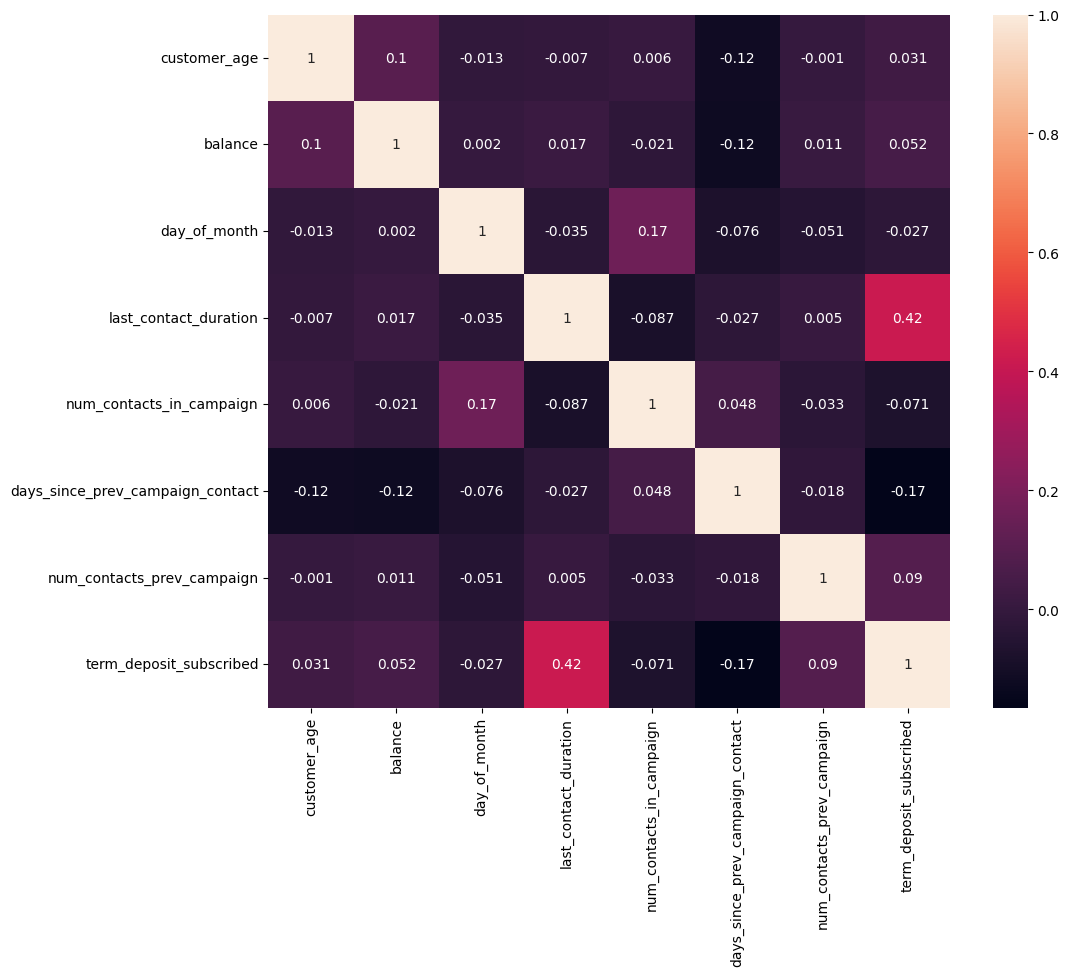

In [13]:
plt.figure(figsize=(11, 9))

df2=round(df.corr(numeric_only=True),3)
sns.heatmap(df2, fmt='.2g', annot=True)

**1. Descriptive Statistics: Compute summary statistics to get an overview of the data.**

In [14]:
# Convert the summary statistics to dataframes
numerical_summary_df = df.describe().reset_index()
categorical_summary_df = df.describe(include=['object']).reset_index()

# Display the summary statistics as dataframes
print("Numerical Features Summary DataFrame:")
print(numerical_summary_df)
print("\nCategorical Features Summary DataFrame:")
print(categorical_summary_df)

Numerical Features Summary DataFrame:
   index  customer_age        balance  day_of_month  last_contact_duration  \
0  count  31028.000000   31248.000000  31647.000000           31336.000000   
1   mean     40.439216    1368.112615     15.818561             256.184038   
2    std     10.751392    3085.342417      8.322970             256.181479   
3    min     18.000000   -8020.000000      1.000000               0.000000   
4    25%     32.000000      72.000000      8.000000             103.000000   
5    50%     39.000000     449.000000     16.000000             179.000000   
6    75%     48.000000    1413.000000     21.000000             315.250000   
7    max     97.000000  102128.000000     31.000000            4900.000000   

   num_contacts_in_campaign  days_since_prev_campaign_contact  \
0              31535.000000                       5816.000000   
1                  2.776629                        224.995186   
2                  3.153293                        114.991828   

Insights
1.Age Distribution: The average age of customers is around 40 years, with a fairly wide range (18 to 97 years).
2.Balance: The balance varies significantly, from negative values to very high values (up to 102,128).
3.Campaign Contacts: The number of contacts in the current campaign mostly ranges from 1 to 63, with a mean of around 3 contacts.
4.Term Deposit Subscription: Only about 10.7% of the customers have subscribed to a term deposit.
5.Categorical Variables: The most common job type is "blue-collar," most customers are married, and the predominant communication type is "cellular."

**Customer Age**

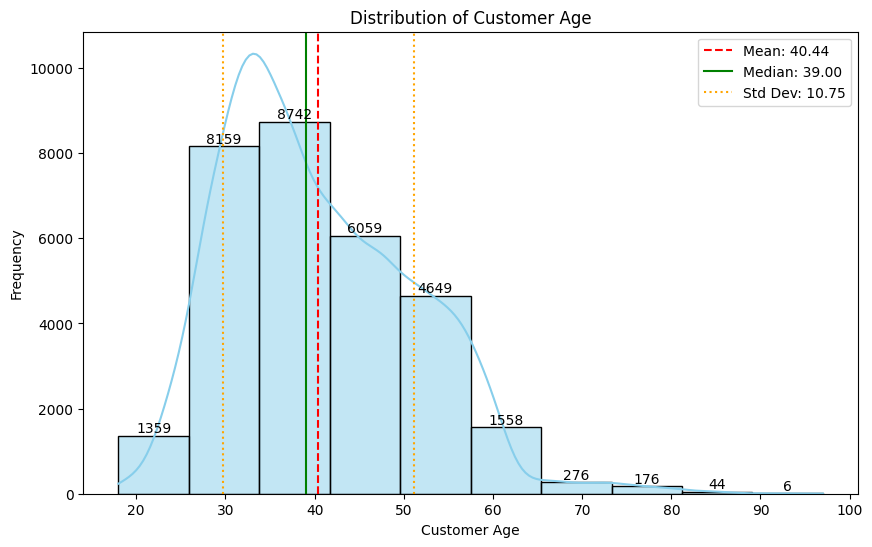

In [15]:
# Sample DataFrame
np.random.seed(0)
#df = pd.DataFrame({'customer_age': np.random.randint(18, 70, 100)})

# Calculate statistics
mean_age = df['customer_age'].mean()
median_age = df['customer_age'].median()
std_age = df['customer_age'].std()

# Create the histogram plot with a different color
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['customer_age'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

# Annotate counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Add vertical lines for mean, median, and standard deviation
plt.axvline(mean_age, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_age:.2f}')
plt.axvline(mean_age - std_age, color='orange', linestyle=':', linewidth=1.5, label=f'Std Dev: {std_age:.2f}')
plt.axvline(mean_age + std_age, color='orange', linestyle=':', linewidth=1.5)

# Add legend
plt.legend()

# Show the plot
plt.show()

**Job Type**

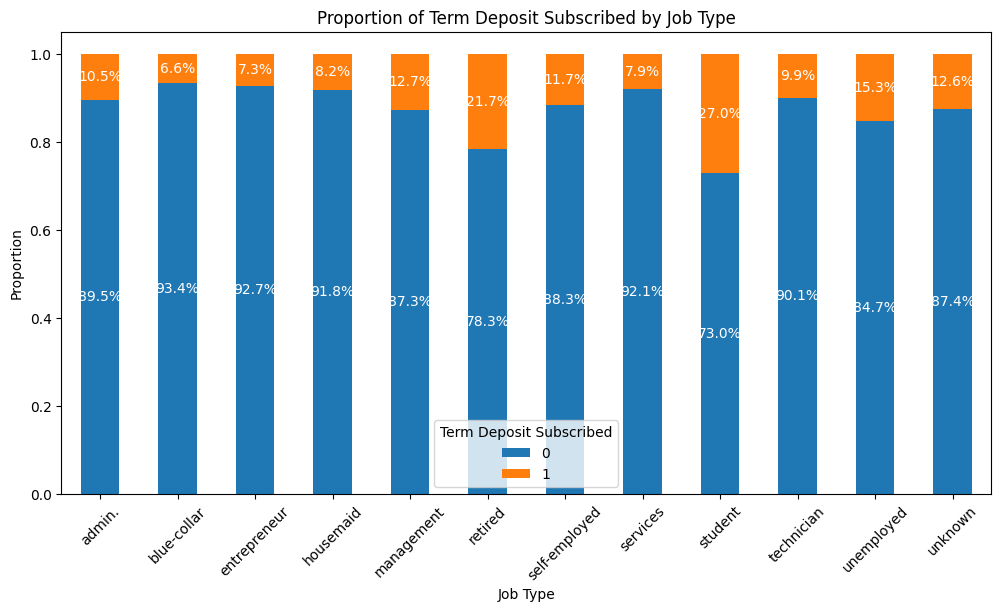

In [16]:
# Create a crosstab of job type and term deposit subscription
job_subscription = pd.crosstab(cus_data['job_type'], cus_data['term_deposit_subscribed'])

# Calculate the proportion of subscriptions
job_subscription_ratio = job_subscription.div(job_subscription.sum(1), axis=0)

# Plot the stacked bar chart
ax = job_subscription_ratio.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add title and labels
plt.title('Proportion of Term Deposit Subscribed by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Proportion')
plt.legend(title='Term Deposit Subscribed')
plt.xticks(rotation=45)

# Annotate each bar with the corresponding percentage
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height*100:.1f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', fontsize=10, color='white', xytext=(0, 0),
                textcoords='offset points')

# Show the plot
plt.show()

**Martial Status**

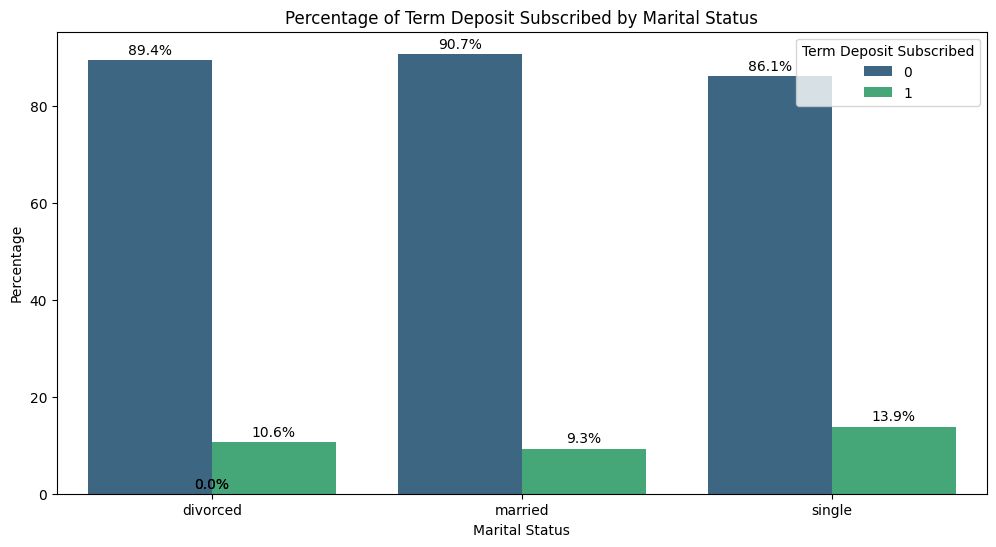

In [17]:
# Calculate the percentage of term deposit subscriptions for each marital status
marital_subscription_counts = cus_data.groupby(['marital', 'term_deposit_subscribed']).size().reset_index(name='count')
total_counts = marital_subscription_counts.groupby('marital')['count'].transform('sum')
marital_subscription_counts['percentage'] = marital_subscription_counts['count'] / total_counts * 100

# Plot the count plot with percentage annotations
plt.figure(figsize=(12, 6))
sns.barplot(data=marital_subscription_counts, x='marital', y='percentage', hue='term_deposit_subscribed', palette='viridis')

# Annotate the bars with the corresponding percentages
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 2),
                       textcoords='offset points')

plt.title('Percentage of Term Deposit Subscribed by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Term Deposit Subscribed')
plt.xticks(rotation=0)
plt.show()

<ipython-input-18-98df8eadc8de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='marital', data=cus_data, palette=sns.color_palette('coolwarm', n_colors=5), edgecolor='black')
<ipython-input-18-98df8eadc8de>:6: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.countplot(x='marital', data=cus_data, palette=sns.color_palette('coolwarm', n_colors=5), edgecolor='black')


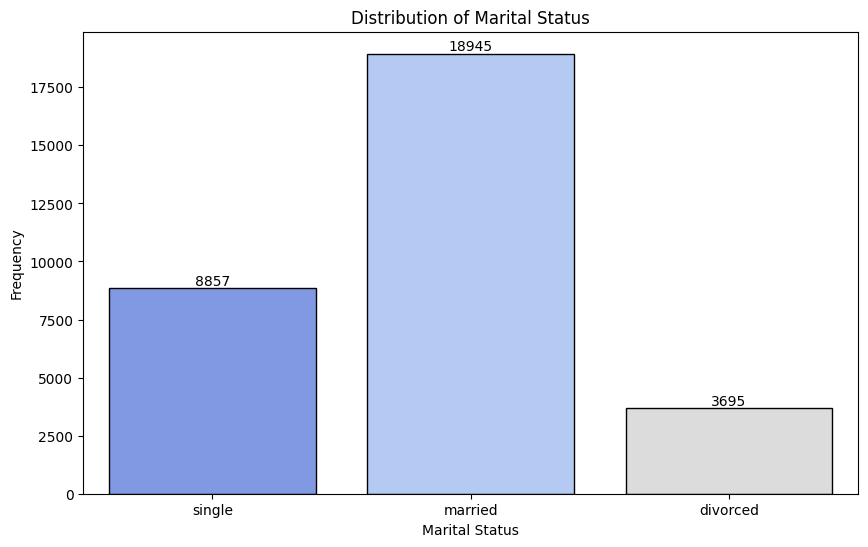

In [18]:

# Calculate the counts for each marital status
marital_status_counts = cus_data['marital'].value_counts()

# Create the count plot with a different color
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='marital', data=cus_data, palette=sns.color_palette('coolwarm', n_colors=5), edgecolor='black')

# Add title and labels
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

# Annotate counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Show the plot
plt.show()

In [19]:
copy_data = cus_data.copy()

**Education**

<ipython-input-20-598a72755f09>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=cleaned_data, x='education', order=education_distribution.index, palette="viridis")


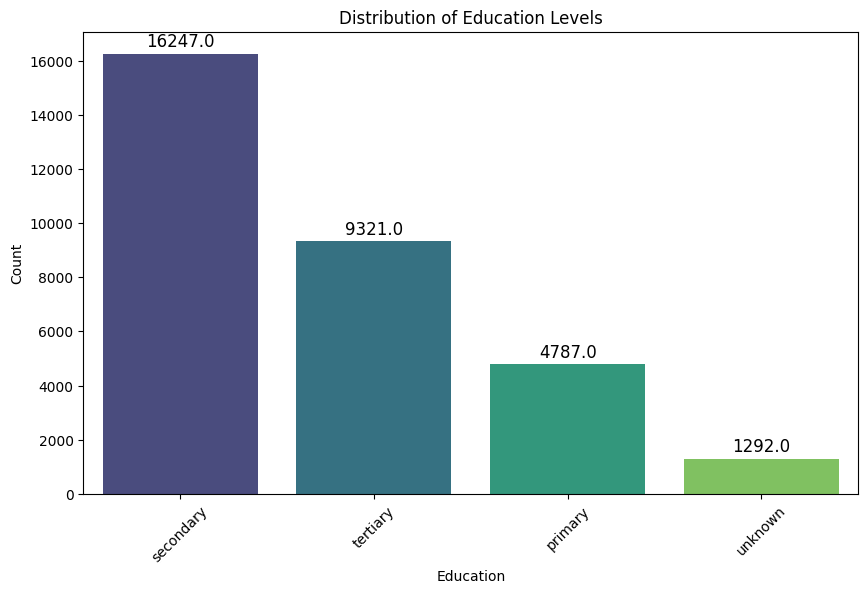

In [20]:
# Handle missing values - for simplicity, we'll drop rows with missing values in the relevant columns for this analysis
cleaned_data = copy_data.dropna(subset=['education', 'term_deposit_subscribed'])

# Distribution of education levels
education_distribution = cleaned_data['education'].value_counts()

# Plot the distribution of education levels
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cleaned_data, x='education', order=education_distribution.index, palette="viridis")
plt.title('Distribution of Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [21]:
from statsmodels.graphics.mosaicplot import mosaic

<ipython-input-22-b4686c330722>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_subscription['term_deposit_subscribed'] = edu_subscription['term_deposit_subscribed'].map({0: 'No', 1: 'Yes'})


<Figure size 1800x1200 with 0 Axes>

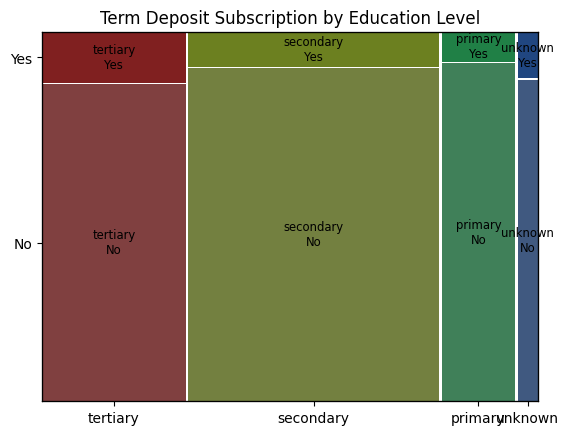

In [22]:
# Handle missing values - for simplicity, we'll drop rows with missing values in the relevant columns for this analysis
cleaned_data = copy_data.dropna(subset=['education', 'term_deposit_subscribed'])

# Prepare data for the mosaic plot
edu_subscription = cleaned_data[['education', 'term_deposit_subscribed']]
edu_subscription['term_deposit_subscribed'] = edu_subscription['term_deposit_subscribed'].map({0: 'No', 1: 'Yes'})

# Plot the mosaic plot
plt.figure(figsize=(18, 12))
mosaic(edu_subscription, ['education', 'term_deposit_subscribed'], title='Term Deposit Subscription by Education Level')
plt.show()

**Balance**

<Figure size 1200x800 with 0 Axes>

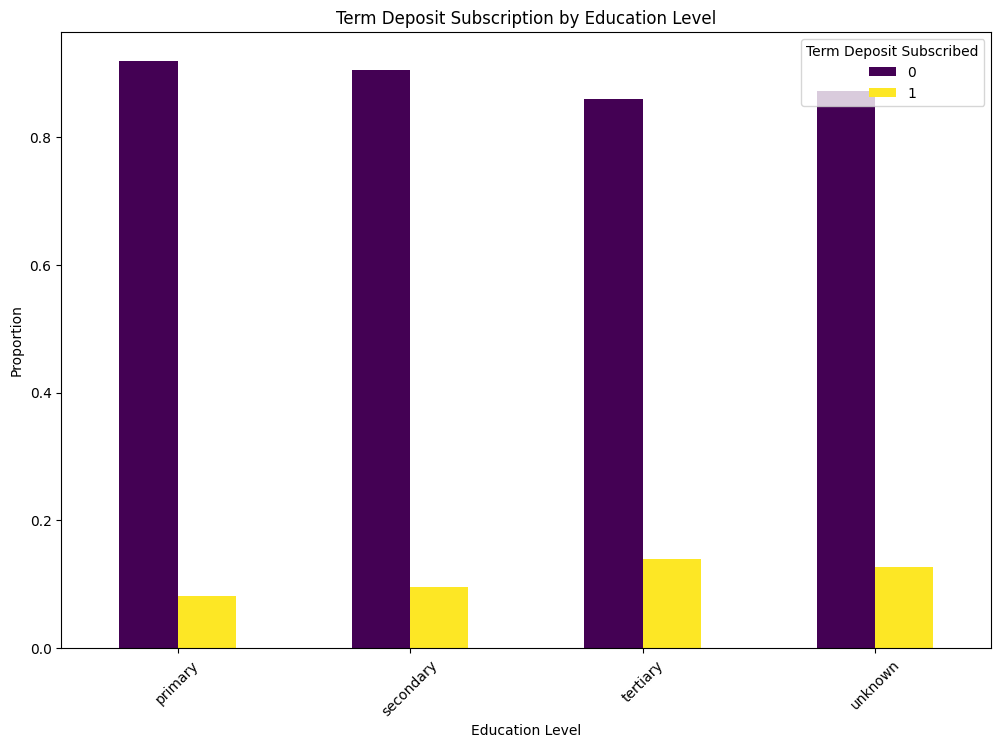

In [23]:
# Calculate proportions
education_subscription = cleaned_data.groupby('education')['term_deposit_subscribed'].value_counts(normalize=True).unstack()

# Plot the relationship - Grouped Bar Plot
plt.figure(figsize=(12, 8))
education_subscription.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='viridis')
plt.title('Term Deposit Subscription by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.legend(title='Term Deposit Subscribed', loc='upper right')
plt.xticks(rotation=45)
plt.show()

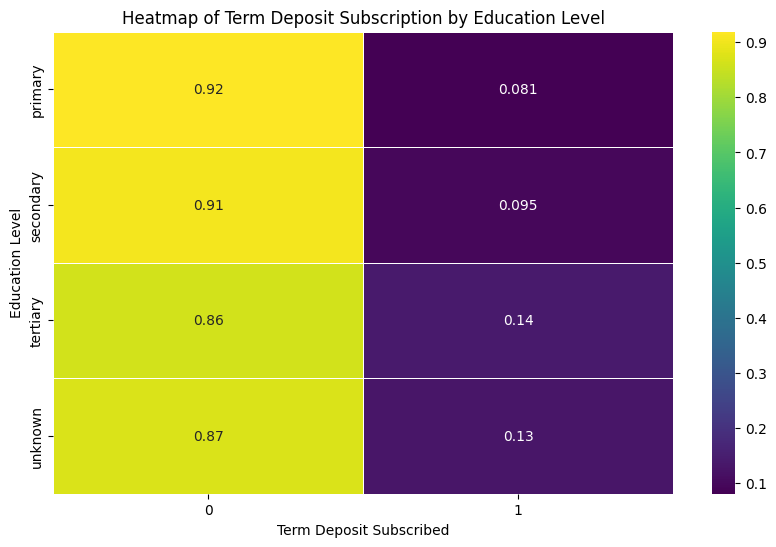

In [24]:
# Plot the relationship - Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(education_subscription, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap of Term Deposit Subscription by Education Level')
plt.xlabel('Term Deposit Subscribed')
plt.ylabel('Education Level')
plt.show()



*   Heatmap: The heatmap visually emphasizes differences in subscription rates across education levels. Darker shades can indicate higher subscription rates for specific education levels.



**Default**

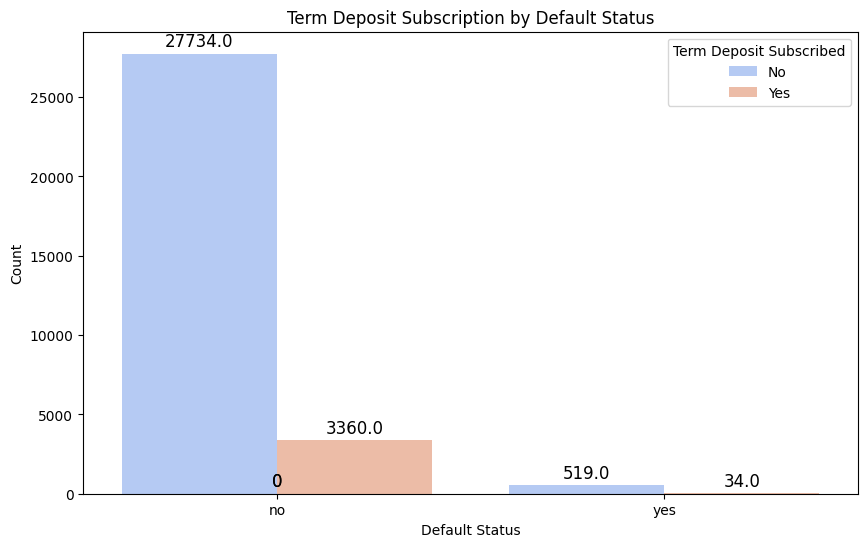

In [25]:
# Handle missing values - we'll drop rows with missing values in the relevant columns for this analysis
cleaned_data = copy_data.dropna(subset=['default', 'term_deposit_subscribed'])

# Bar Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cleaned_data, x='default', hue='term_deposit_subscribed', palette="coolwarm")
plt.title('Term Deposit Subscription by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [26]:
# Pivot Table
pivot_table = cleaned_data.pivot_table(values='term_deposit_subscribed', index='default', aggfunc=['count', 'mean'])
pivot_table.columns = ['Total Customers', 'Subscription Rate']
print(pivot_table)

         Total Customers  Subscription Rate
default                                    
no                 31094           0.108059
yes                  553           0.061483


**Housing_loan**

<Axes: title={'center': 'Percentage wise house loan'}, ylabel='count'>

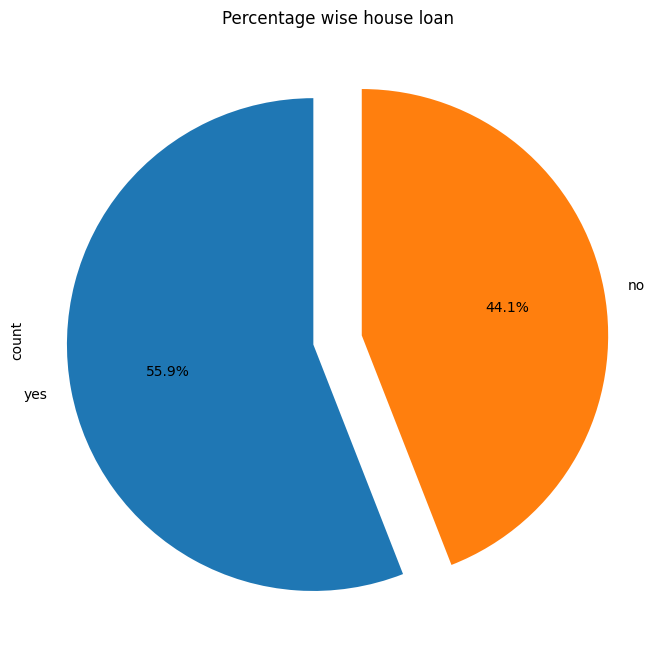

In [27]:
copy_data["housing_loan"].value_counts().plot(kind='pie',figsize=(9,8),autopct="%1.1f%%", startangle=90, explode=(0.1,0.1), title='Percentage wise house loan')

In [28]:
copy_data.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

**Personal Loan**

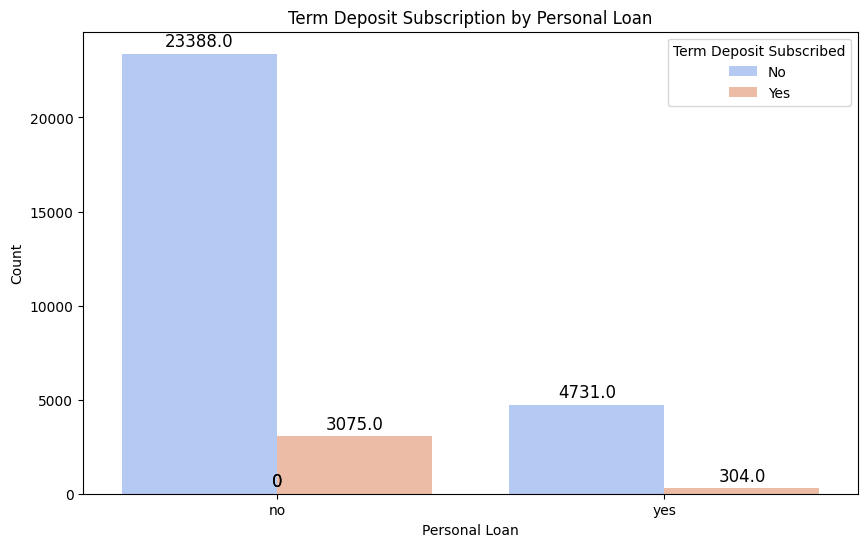

In [29]:
# Bar Plot for Personal Loan
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='personal_loan', hue='term_deposit_subscribed', palette="coolwarm")
plt.title('Term Deposit Subscription by Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])

# Add counts on top of the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


**Communication Type**

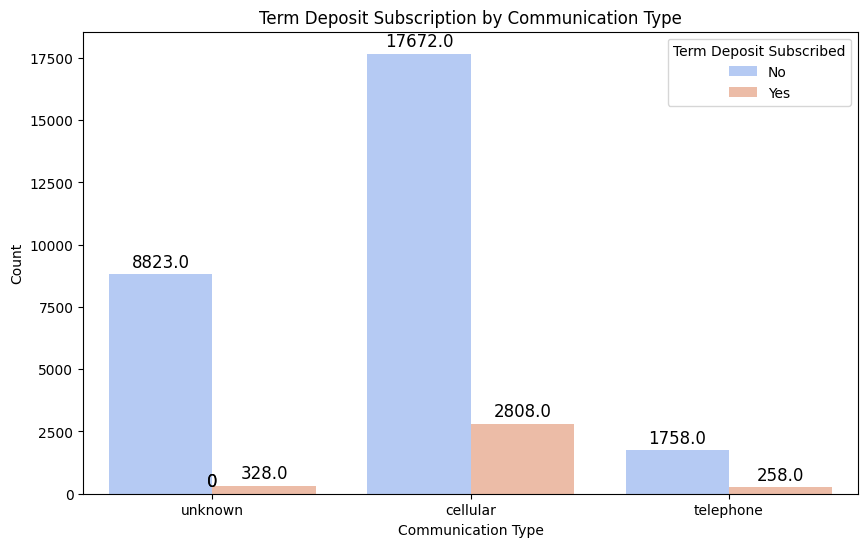

In [30]:
# Bar Plot for Communication Type
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='communication_type', hue='term_deposit_subscribed', palette="coolwarm")
plt.title('Term Deposit Subscription by Communication Type')
plt.xlabel('Communication Type')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])

# Add counts on top of the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


**Day of Month**

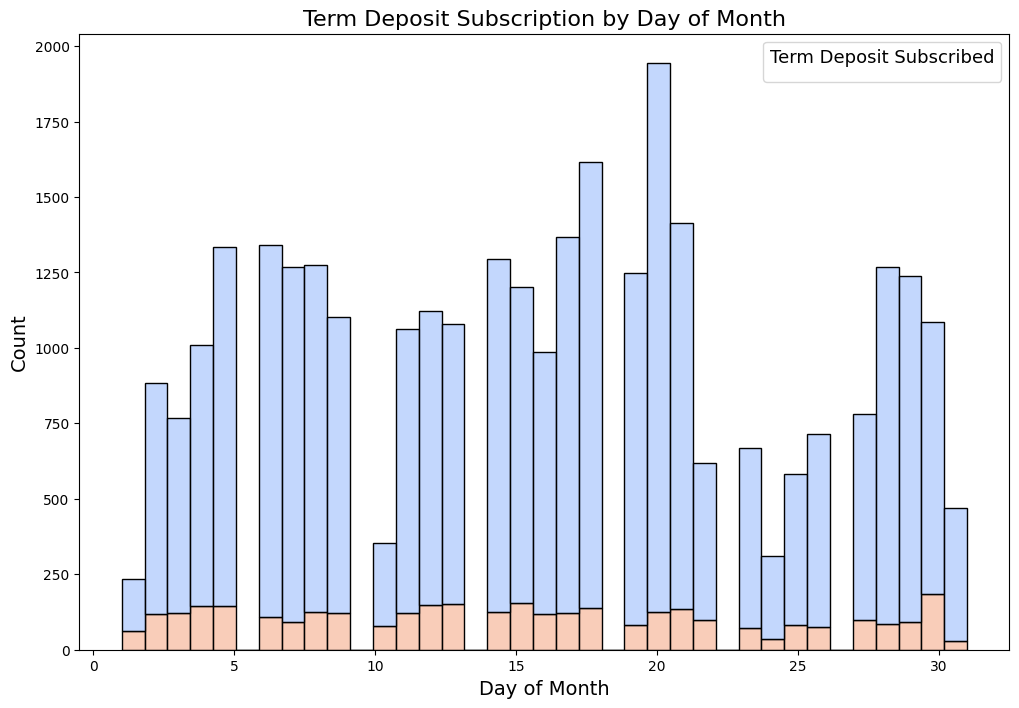

In [31]:

# Assuming cleaned_data is your DataFrame and 'term_deposit_subscribed' is a categorical column

plt.figure(figsize=(12, 8))
sns.histplot(
    data=cleaned_data,
    x='day_of_month',
    hue='term_deposit_subscribed',
    multiple='stack',
    palette="coolwarm",
    alpha=0.7,
    edgecolor='black'
)

# Adding titles and labels
plt.title('Term Deposit Subscription by Day of Month', fontsize=16)
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding legend with title
plt.legend(title='Term Deposit Subscribed', title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

**Month**

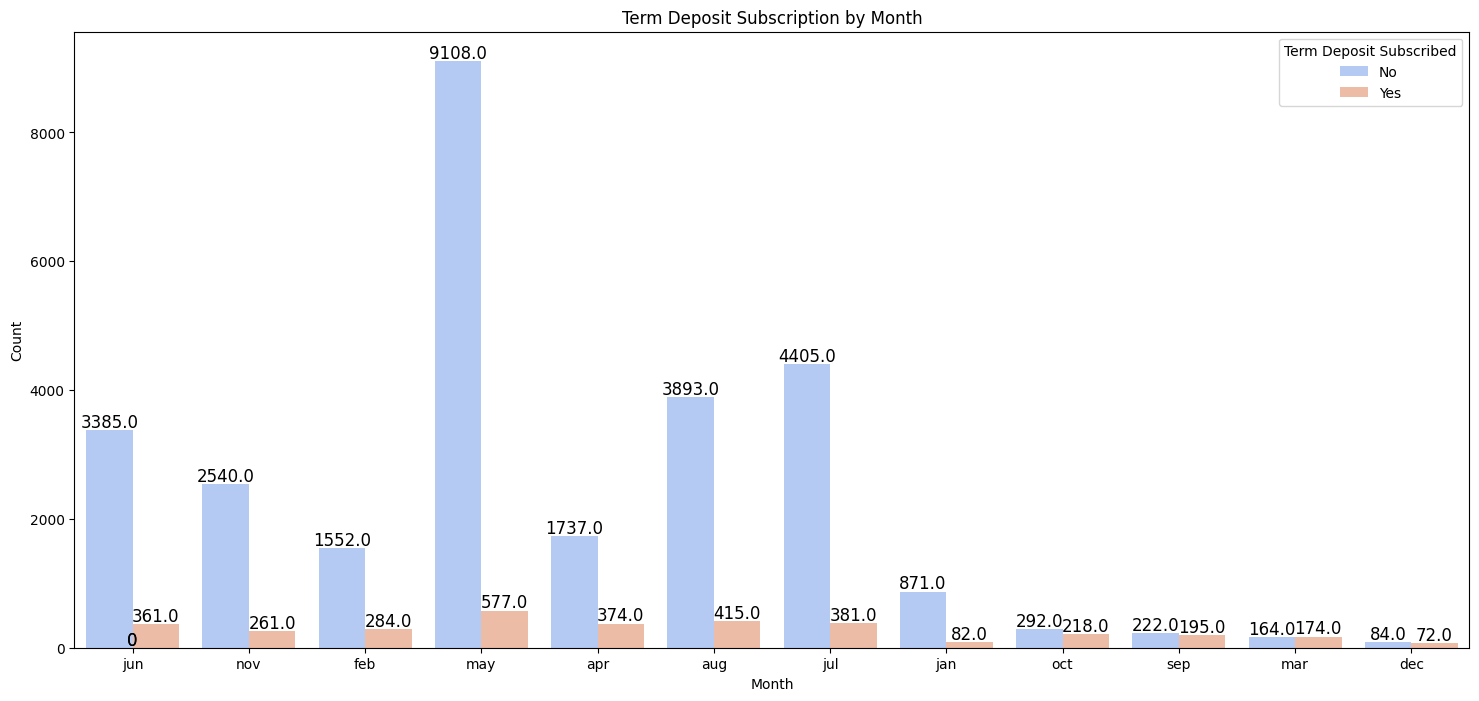

In [32]:
# Bar Plot for Month
plt.figure(figsize=(18, 8))
sns.countplot(data=cleaned_data, x='month', hue='term_deposit_subscribed', palette="coolwarm")
plt.title('Term Deposit Subscription by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])

# Add counts on top of the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 2),
                textcoords='offset points')

plt.show()


**Last Contact Duration**

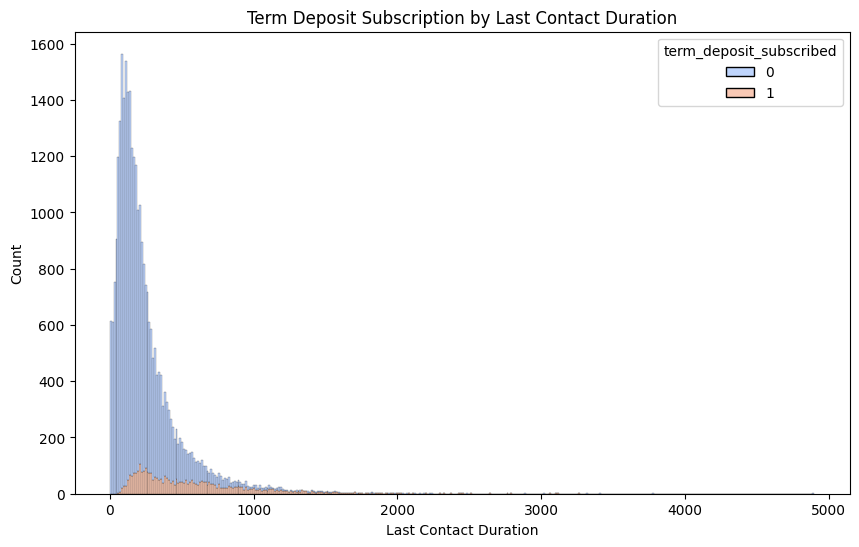

In [33]:
# Histogram for Last Contact Duration
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x='last_contact_duration', hue='term_deposit_subscribed', multiple='stack', palette="coolwarm")
plt.title('Term Deposit Subscription by Last Contact Duration')
plt.xlabel('Last Contact Duration')
plt.ylabel('Count')
plt.show()


**Number of Contacts in Campaign**

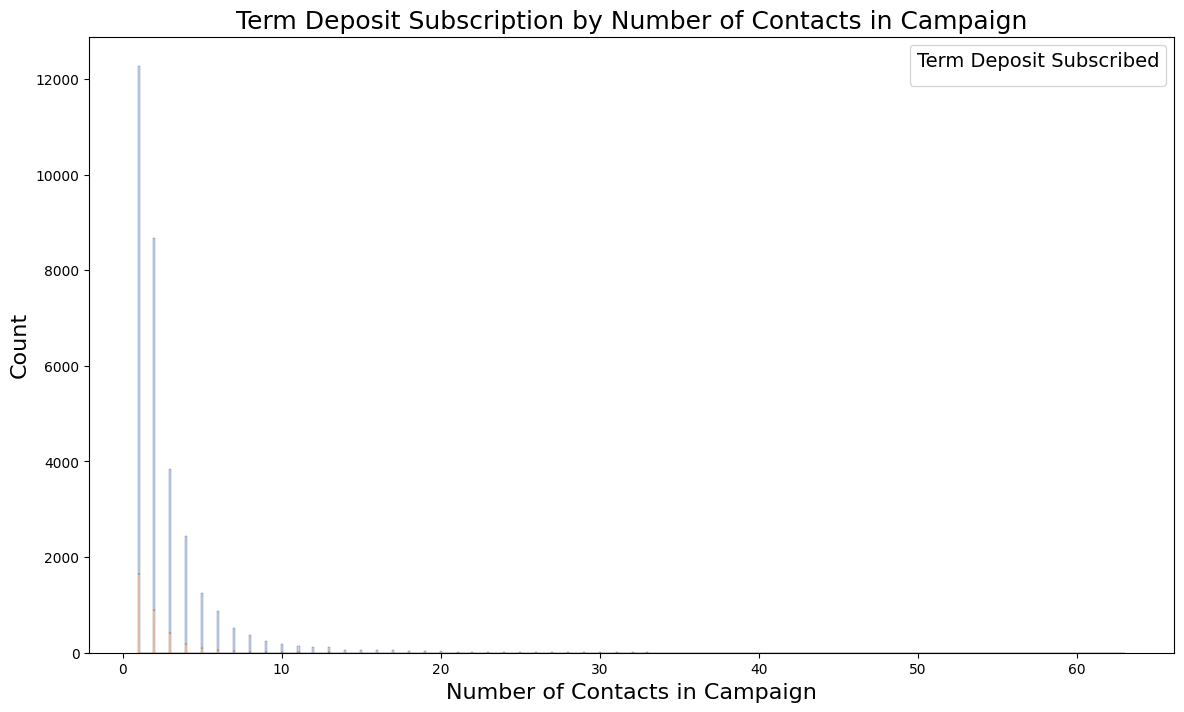

In [34]:


# Assuming cleaned_data is your DataFrame and 'term_deposit_subscribed' is a categorical column

plt.figure(figsize=(14, 8))  # Increased figure size for better visualization
sns.histplot(
    data=cleaned_data,
    x='num_contacts_in_campaign',
    hue='term_deposit_subscribed',
    multiple='stack',
    palette="coolwarm",
    alpha=0.7,
    edgecolor='black'
)

# Adding titles and labels
plt.title('Term Deposit Subscription by Number of Contacts in Campaign', fontsize=18)
plt.xlabel('Number of Contacts in Campaign', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Adding legend with title
plt.legend(title='Term Deposit Subscribed', title_fontsize='14', fontsize='12')

# Adjust x and y limits if necessary (commented out, use if needed)
# plt.xlim(0, max(cleaned_data['num_contacts_in_campaign'])+1)
# plt.ylim(0, max_count + 10) # Assuming max_count is calculated based on your data

# Show the plot
plt.show()


<ipython-input-35-61c1bfc0a01d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='term_deposit_subscribed', y='num_contacts_in_campaign', palette="coolwarm")


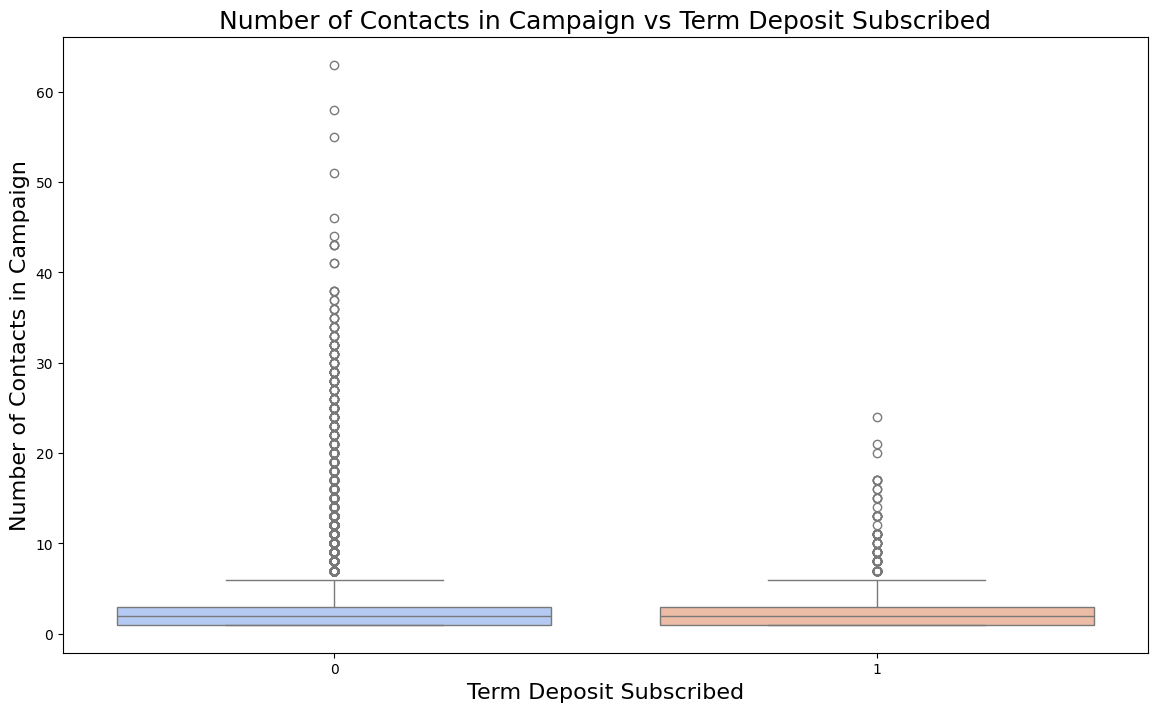

In [35]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=cleaned_data, x='term_deposit_subscribed', y='num_contacts_in_campaign', palette="coolwarm")
plt.title('Number of Contacts in Campaign vs Term Deposit Subscribed', fontsize=18)
plt.xlabel('Term Deposit Subscribed', fontsize=16)
plt.ylabel('Number of Contacts in Campaign', fontsize=16)
plt.show()

**Previous Campaign Outcome**

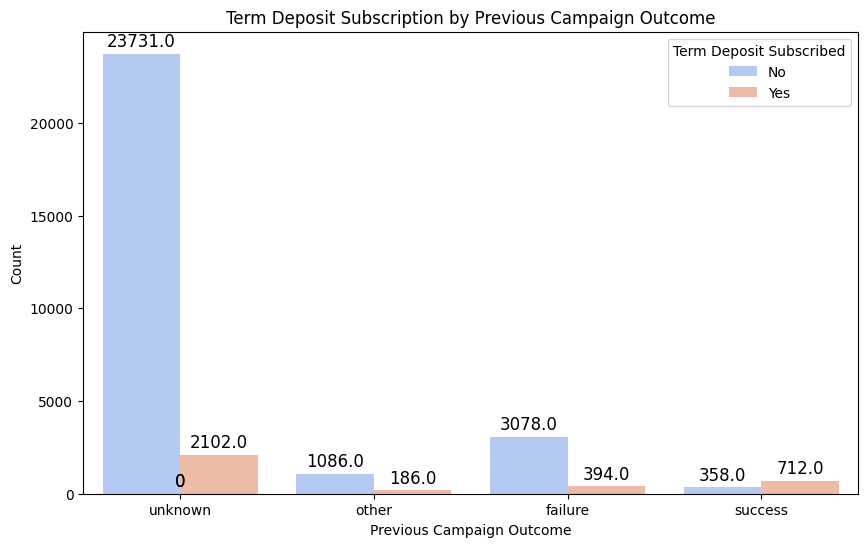

In [36]:
# Bar Plot for Previous Campaign Outcome
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='prev_campaign_outcome', hue='term_deposit_subscribed', palette="coolwarm")
plt.title('Term Deposit Subscription by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])

# Add counts on top of the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


# **3.  Preprocess the Data**

## **1. Handle Missing Values**

In [37]:
# Check for missing values
no_bold_text = "\033[1mNumber of missing values\033[0m"
print(no_bold_text)
missing_values = df.isnull().sum()

  # Display columns with missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
pe_bold_text = "\033[1mPercentage of missing values\033[0m"
print(pe_bold_text)
print(missing_percentage)

Number of missing values
customer_age                          619
marital                               150
balance                               399
personal_loan                         149
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
dtype: int64
Percentage of missing values
customer_age                         1.955952
marital                              0.473979
balance                              1.260783
personal_loan                        0.470819
last_contact_duration                0.982716
num_contacts_in_campaign             0.353904
days_since_prev_campaign_contact    81.622271
dtype: float64


In [38]:
# 1. Handle Missing Values

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Before Cleaning:")
print(missing_values)

Missing Values Before Cleaning:
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64


# **Skewness**

In [39]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# List of column names to be removed
remove_columns = ['term_deposit_subscribed']

# Remove specified columns from the list of numerical columns
col = [col for col in numerical_columns if col not in remove_columns]

print("Numerical columns:", col)

# Calculate skewness for each remaining numerical column
skewness = df[col].apply(lambda x: skew(x.dropna()))

print("Skewness of numerical columns:\n", skewness)

Numerical columns: ['customer_age', 'balance', 'day_of_month', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign']
Skewness of numerical columns:
 customer_age                         0.661921
balance                              8.504719
day_of_month                         0.091905
last_contact_duration                3.165717
num_contacts_in_campaign             4.999934
days_since_prev_campaign_contact     0.649311
num_contacts_prev_campaign          45.830834
dtype: float64


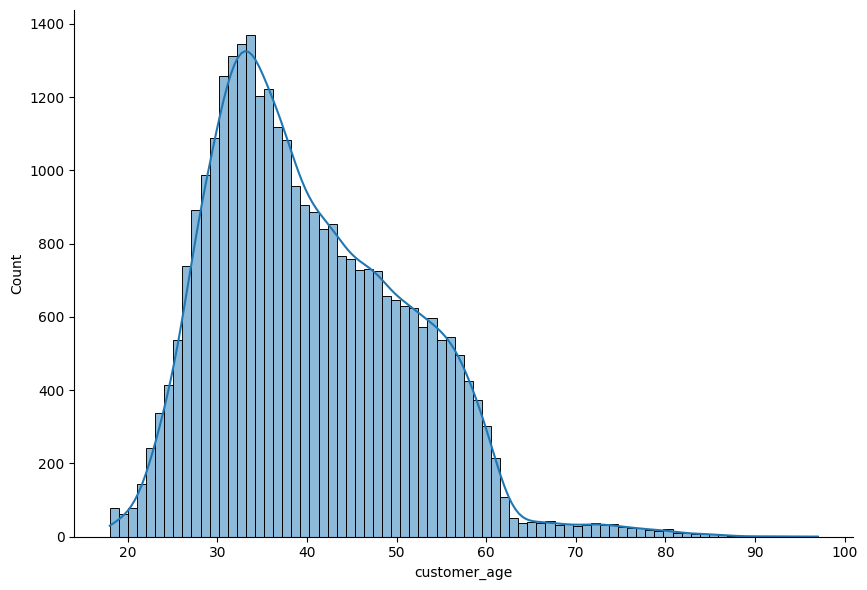

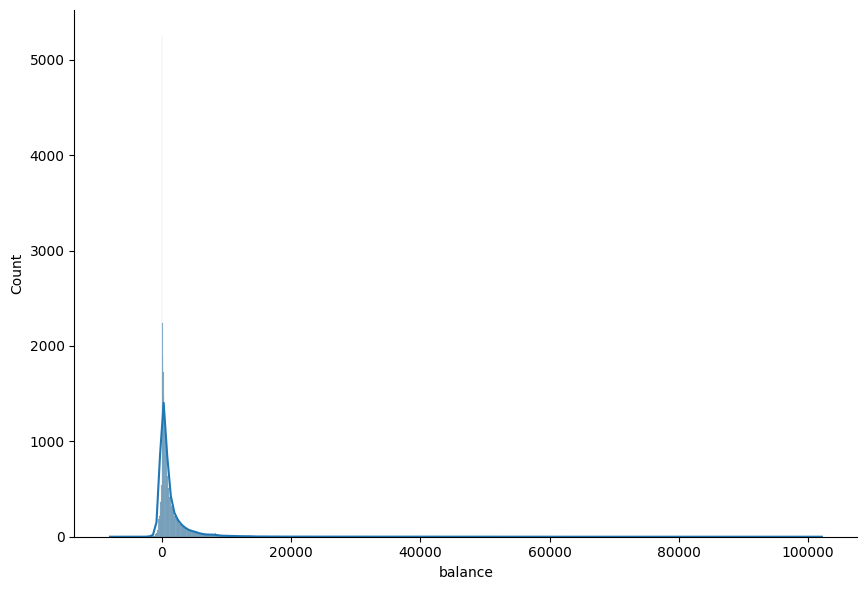

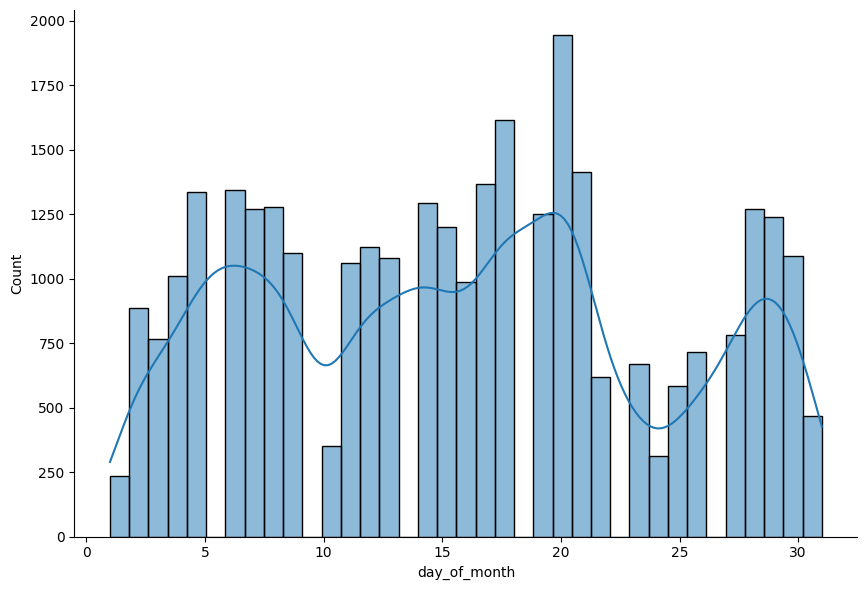

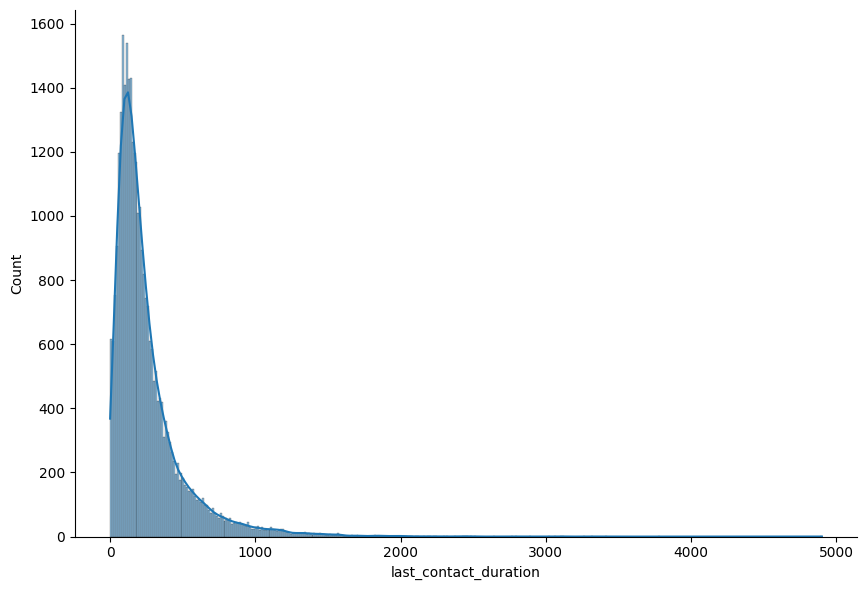

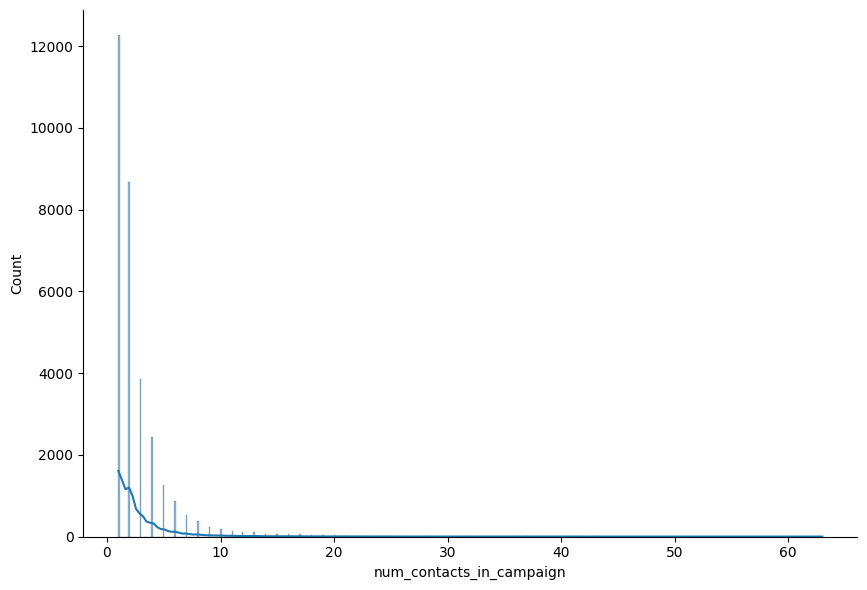

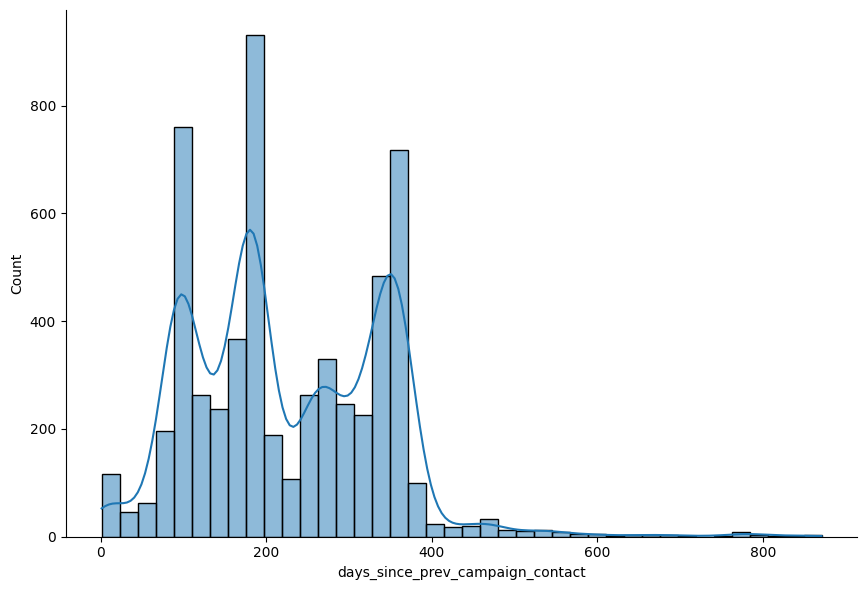

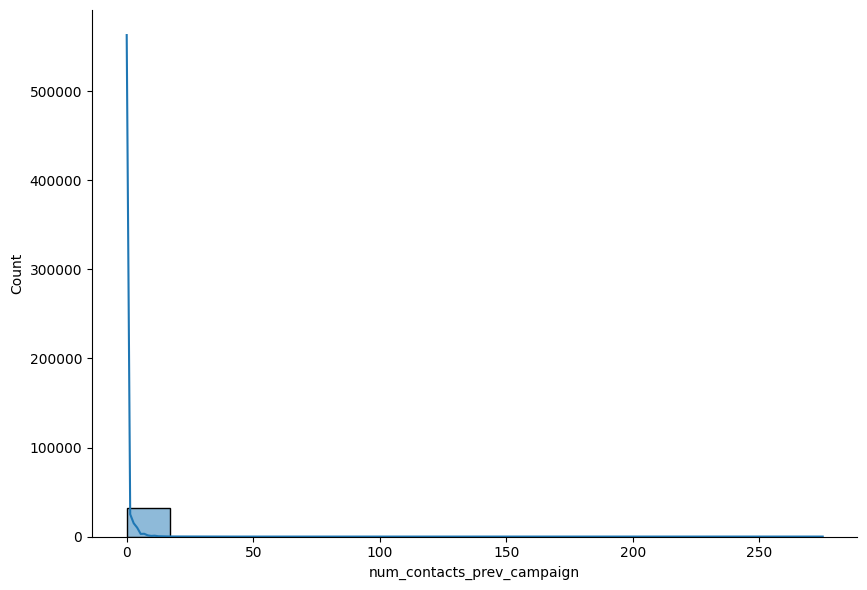

In [40]:
for columns in col:
  sns.displot(data=df, x=columns, kde=True,height=6, aspect=11.7/8)

# Skewness Graph

The given distribution plots indicate the skewness or distribution of feature that contain missing values. The inferences taken from the graph are:


*   Three Columns are indicates normal distribution(customer_age,day_of_month,days_since_prev_campaign_contact) - Mean
*   Rest of the Four columns shows right skewness (Positive) (balancelast_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign)  - Median



In [41]:
df.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

# Missing Value Imputation

1. Simple imputation

In [42]:
# Determine imputation method based on skewness
imputation_methods = {}

for column in col:
    if abs(skewness[column]) < 0.7:
        imputation_methods[column] = 'mean'
    else:
        imputation_methods[column] = 'median'

print("Chosen imputation methods:\n", imputation_methods)

# Apply imputation
for column in col:
    if imputation_methods[column] == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif imputation_methods[column] == 'median':
        imputer = SimpleImputer(strategy='median')

    df[column] = imputer.fit_transform(df[[column]])

print("Imputed DataFrame:\n", df.head())

Chosen imputation methods:
 {'customer_age': 'mean', 'balance': 'median', 'day_of_month': 'mean', 'last_contact_duration': 'median', 'num_contacts_in_campaign': 'median', 'days_since_prev_campaign_contact': 'mean', 'num_contacts_prev_campaign': 'median'}
Imputed DataFrame:
    customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   
3          34.0     services   single  secondary      no      2.0   
4          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown          26.0   jun   
1           no           yes           cellular          18.0   nov   
2           no            no           cellular           5.0   feb   
3          yes            

In [43]:
# Strategy: Remove rows with missing target values and impute missing values for other columns
df = df.dropna(subset=['term_deposit_subscribed'])  # Remove rows with missing target values

# Object Columns
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [44]:
# 1. Handle Missing Values

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Before Cleaning:")
print(missing_values)

Missing Values Before Cleaning:
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64


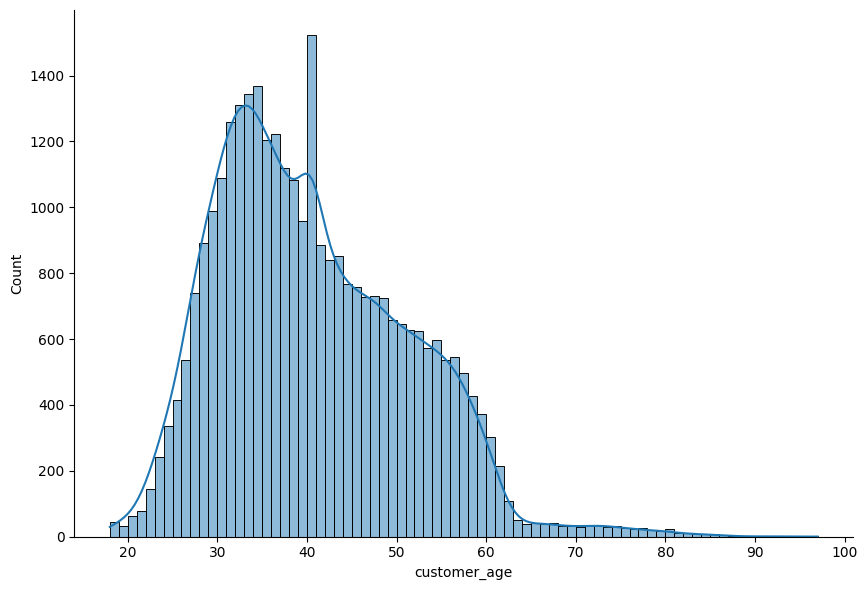

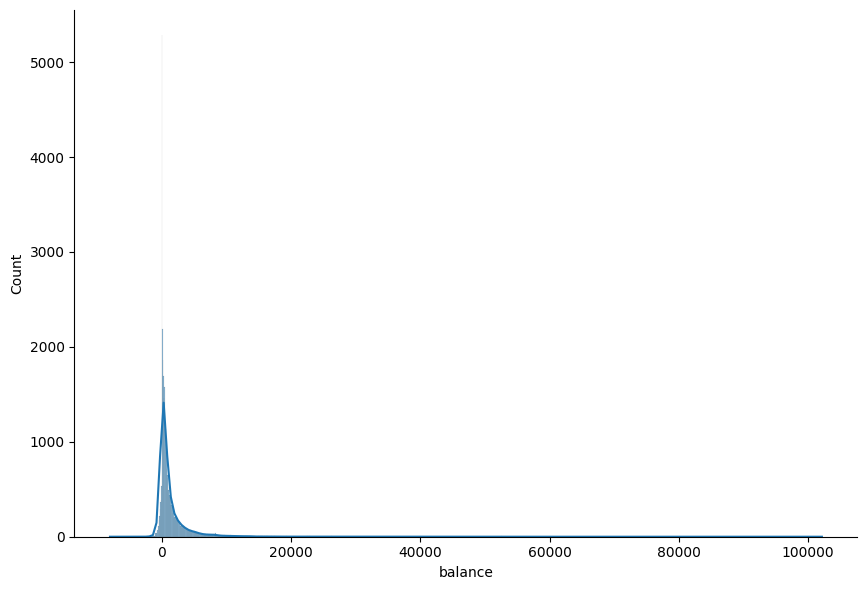

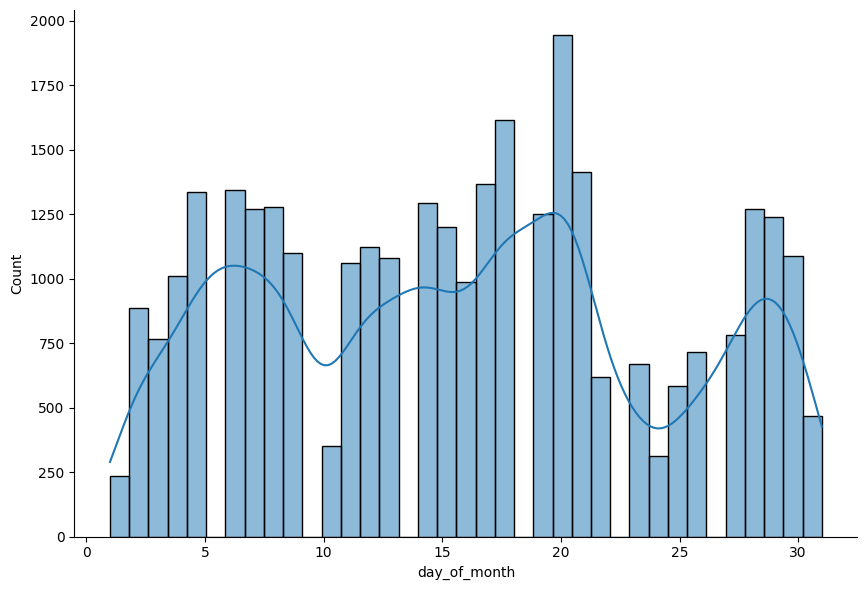

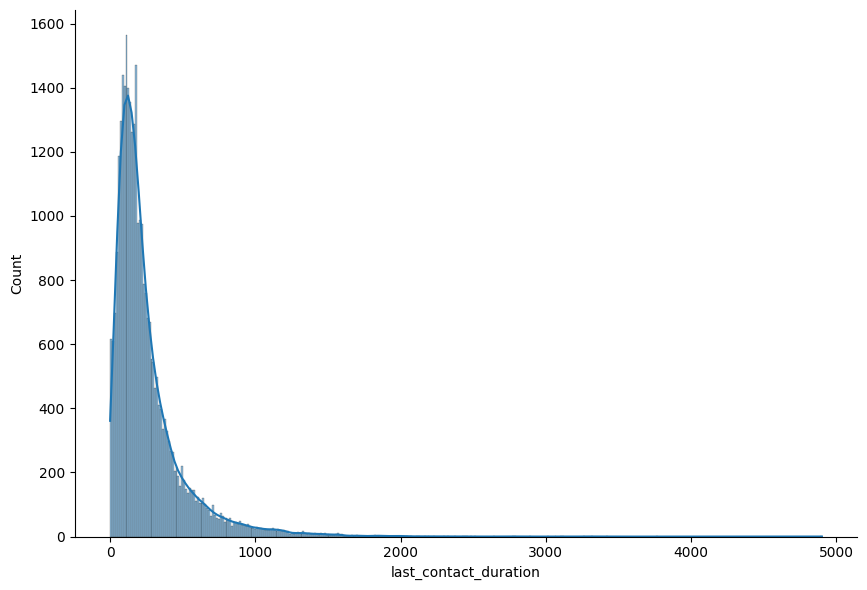

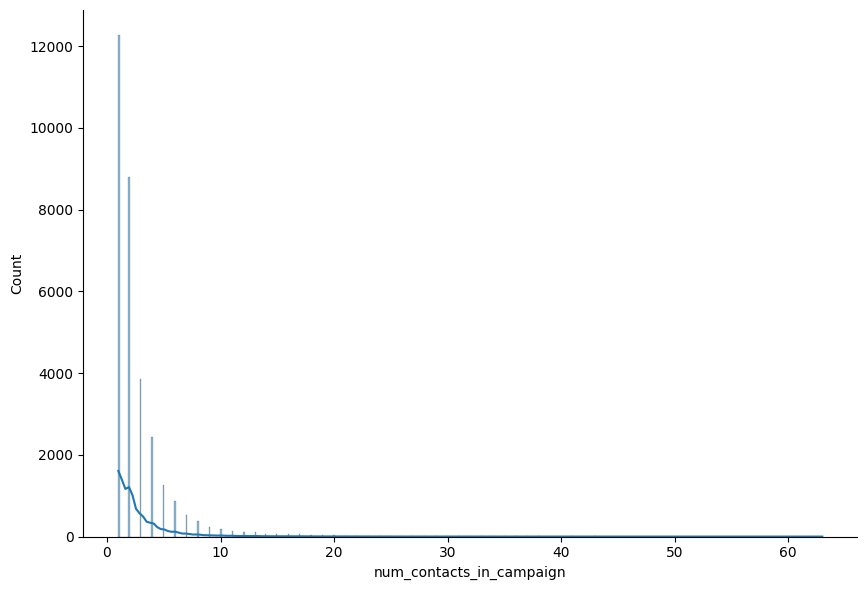

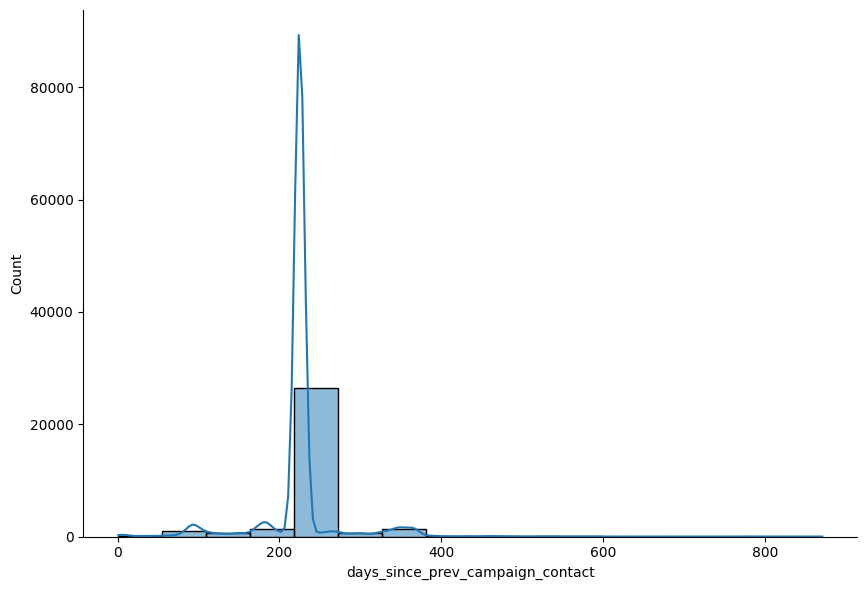

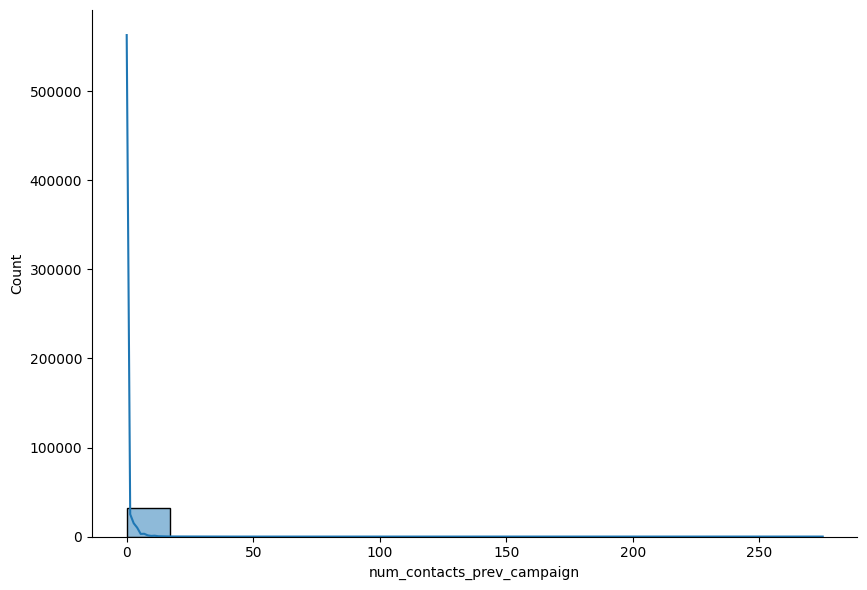

In [45]:
for columns in col:
  sns.displot(data=df, x=columns, kde=True,height=6, aspect=11.7/8)

**Ensured that the imputation did not significantly altered the distribution.**

2. Advanced Imputation
   (KNN imputation)

In [54]:

cols=df.columns
# Should be done after encoding and before scaling
from sklearn.impute import KNNImputer
# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=2)

# Fit the imputer on the data and transform it
df = imputer.fit_transform(df)

# Convert the numpy array back to a DataFrame with the original columns
df = pd.DataFrame(df,columns=cols)
df

ValueError: could not convert string to float: 'management'

## **2.Detecting Outliers**

In [48]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.439216,1356.524599,15.818561,255.425538,2.773881,224.995186,0.591620,0.107246
std,10.645723,3067.545042,8.322970,255.033242,3.148046,49.292679,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,75.000000,8.000000,103.000000,1.000000,224.995186,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,224.995186,0.000000,0.000000
75%,48.000000,1394.000000,21.000000,313.000000,3.000000,224.995186,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


**Outlier Visualisation**

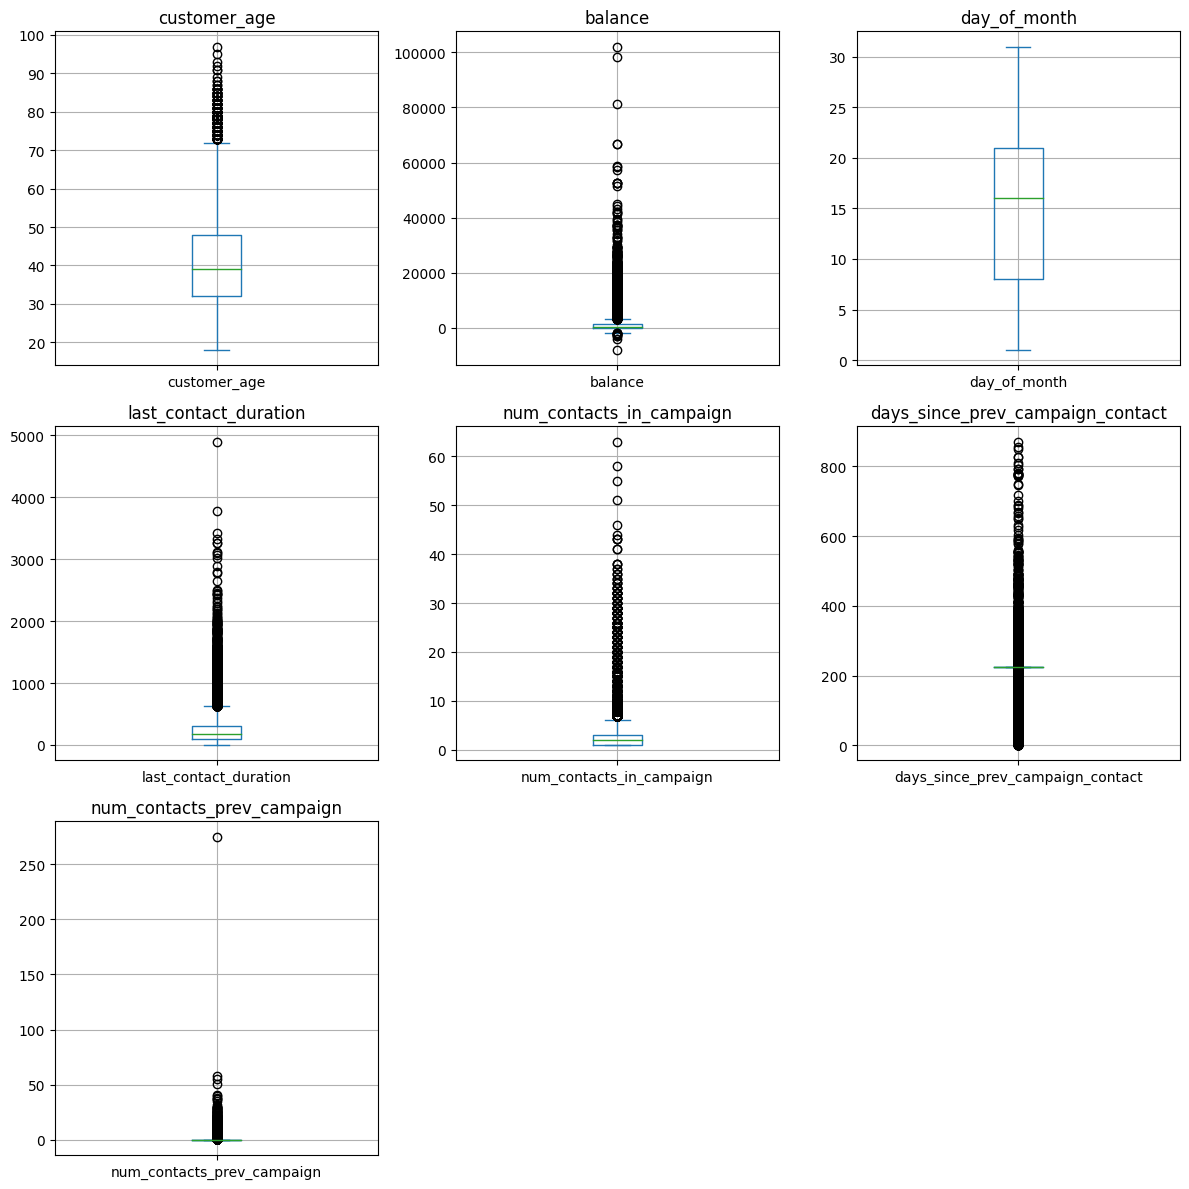

In [49]:


# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot boxplots for each feature
for i, feature in enumerate(col):
    if feature in df.columns:
        df[feature].plot(kind='box', ax=axes[i], fontsize=10)
        axes[i].set_title(feature)
        axes[i].grid(True)
    else:
        axes[i].set_visible(False)  # Hide the subplot if the feature is not in the DataFrame

# Hide any unused subplots if there are fewer than 20 features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [50]:


outlier_info = {}

for col in col:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(df)) * 100

    # Store the results
    outlier_info[col] = {
        'Number of Outliers': len(outliers),
        'Percentage of Outliers': outlier_percentage
    }

# Display the outlier information
for col, info in outlier_info.items():
    print(f"{col}: {info['Number of Outliers']} outliers, {info['Percentage of Outliers']:.2f}%")

customer_age: 257 outliers, 0.81%
balance: 3381 outliers, 10.68%
day_of_month: 0 outliers, 0.00%
last_contact_duration: 2328 outliers, 7.36%
num_contacts_in_campaign: 2178 outliers, 6.88%
days_since_prev_campaign_contact: 5816 outliers, 18.38%
num_contacts_prev_campaign: 5816 outliers, 18.38%


In [51]:
# do this only for continuous numeric variables
df1 = df.copy()

class DataFrameOutlierDetector:
  def __init__(self, df1):
    self.df1 = df1

  def detect_outliers(self, column_name):

    Q1 = self.df1[column_name].quantile(0.25)
    Q3 = self.df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = self.df1[(self.df1[column_name] < lower_bound) | (self.df1[column_name] > upper_bound)]

    outlier_df=pd.DataFrame(outliers)
    return outlier_df

  def outlier_describe(self, column_name):

    original_stats = self.df1[column_name].describe()
    outlier = self.detect_outliers(column_name)
    non_outliers = self.df1[~self.df1.index.isin(outlier.index)]
    non_outlier_stats = non_outliers[column_name].describe()

    return pd.DataFrame({
        'with_outliers': original_stats,
        'without_outliers': non_outlier_stats
    })

  def plot_box(self, column_name):

    plt.figure(figsize=(6, 4))
    self.df1.boxplot(column=column_name)
    plt.title(f'Box plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()

detector = DataFrameOutlierDetector(df1)

In [ ]:
df.columns

# Outlier Analysis

1.Customer Age

In [ ]:
detector.plot_box('customer_age')

In [ ]:
detector.detect_outliers('customer_age')

In [ ]:
detector.outlier_describe('customer_age')

2. Balance

In [ ]:
detector.plot_box('balance')

In [ ]:
detector.detect_outliers('balance')

In [ ]:
detector.outlier_describe('balance')

2. Day of Month

In [ ]:
detector.plot_box('day_of_month')
detector.detect_outliers('day_of_month')
detector.outlier_describe('day_of_month')

In [ ]:
detector.detect_outliers('day_of_month')

In [ ]:
detector.plot_box('last_contact_duration')
detector.outlier_describe('last_contact_duration')


In [ ]:
detector.detect_outliers('last_contact_duration')

In [ ]:
detector.plot_box('num_contacts_in_campaign')
detector.outlier_describe('num_contacts_in_campaign')

In [ ]:
detector.detect_outliers('num_contacts_in_campaign')

In [ ]:
detector.plot_box('days_since_prev_campaign_contact')
detector.outlier_describe('days_since_prev_campaign_contact')

In [ ]:
detector.detect_outliers('days_since_prev_campaign_contact')

# **Scaling**

In [52]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [53]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols
# Ensure numerical features are non-negative by applying MinMaxScaler
numerical_cols = df.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# **Feature Selection for Categorical**

In [55]:
from sklearn.feature_selection import chi2, mutual_info_classif

In [56]:
# Define the categorical columns
categorical_columns = [
    'job_type', 'marital', 'education', 'default', 'housing_loan',
    'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome'
]

# Verify that all categorical columns exist in the dataset
missing_columns = [col for col in categorical_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"Missing columns in the dataset: {missing_columns}")

# Apply label encoding to categorical columns
label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_columns}
encoded_data = df

for col, le in label_encoders.items():
    encoded_data[col] = le.transform(df[col])

# Extract features and target
X = encoded_data[categorical_columns]
y = encoded_data['term_deposit_subscribed']

# Handle NaN values by filling with a placeholder (e.g., -1)
X.fillna(-1, inplace=True)

# Chi-squared test
chi2_scores, p_values = chi2(X, y)

# Mutual information
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Create a DataFrame to display scores
feature_scores = pd.DataFrame({
    'Feature': categorical_columns,
    'Chi2_Score': chi2_scores,
    'Chi2_p_value': p_values,
    'Mutual_Information': mi_scores
})

feature_scores.sort_values(by='Mutual_Information', ascending=False, inplace=True)
print(feature_scores)

# Select top features based on mutual information score threshold
threshold = 0.01  # Example threshold
top_features = feature_scores[feature_scores['Mutual_Information'] > threshold]['Feature'].tolist()

print("Top categorical features based on mutual information:", top_features)

                 Feature  Chi2_Score   Chi2_p_value  Mutual_Information
8  prev_campaign_outcome   74.824531   5.144649e-18            0.033361
7                  month   12.590178   3.877793e-04            0.025623
6     communication_type  822.619830  6.519101e-181            0.013025
4           housing_loan  291.830249   1.985024e-65            0.010430
0               job_type  152.442950   5.070103e-35            0.008301
2              education   61.464606   4.507739e-15            0.002576
5          personal_loan  115.516654   6.064760e-27            0.002468
1                marital   22.468708   2.135950e-06            0.001995
3                default   12.095886   5.053319e-04            0.000225
Top categorical features based on mutual information: ['prev_campaign_outcome', 'month', 'communication_type', 'housing_loan']


<ipython-input-56-7e704682dfc4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(-1, inplace=True)


In [57]:
df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,0.126582,4,2,2,0,0.075399,1,0,2,0.833333,6,0.061837,0.048387,0.257466,0.000000,3,0.0
1,0.202532,1,1,1,0,0.081291,0,1,0,0.566667,9,0.029184,0.016129,0.150575,0.003636,1,0.0
2,0.354430,9,1,1,0,0.078767,0,0,0,0.133333,3,0.020612,0.048387,0.257466,0.000000,3,0.0
3,0.202532,7,2,1,0,0.072829,1,0,2,0.633333,8,0.025918,0.032258,0.257466,0.000000,3,0.0
4,0.291139,1,1,0,0,0.085086,1,0,0,0.400000,8,0.010000,0.016129,0.257466,0.000000,3,0.0


**bold text**

# **5. Encoding**

# Onehot Encoding

In [58]:
df = df.drop(columns=['default','marital','month','education'], axis = 1)
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [59]:


from sklearn.preprocessing import OneHotEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(drop='first',sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

#data = data.drop(columns=['PreferedOrderCat','MaritalStatus'])
# Drop the original categorical columns from the dataset
df = df.drop(columns=categorical_columns, axis=1)

# Concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot_df], axis=1)
df = pd.DataFrame(df)
df

,customer_age,job_type,balance,housing_loan,personal_loan,communication_type,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,0.126582,4,0.075399,1,0,2,0.833333,0.061837,0.048387,0.257466,0.000000,3,0.0
1,0.202532,1,0.081291,0,1,0,0.566667,0.029184,0.016129,0.150575,0.003636,1,0.0
2,0.354430,9,0.078767,0,0,0,0.133333,0.020612,0.048387,0.257466,0.000000,3,0.0
3,0.202532,7,0.072829,1,0,2,0.633333,0.025918,0.032258,0.257466,0.000000,3,0.0
4,0.291139,1,0.085086,1,0,0,0.400000,0.010000,0.016129,0.257466,0.000000,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.506329,0,0.077959,1,0,0,0.033333,0.020204,0.016129,0.303448,0.010909,1,0.0
31643,0.417722,4,0.082543,0,0,2,0.633333,0.006327,0.096774,0.257466,0.000000,3,0.0
31644,0.291139,10,0.075008,1,0,2,0.733333,0.018163,0.016129,0.257466,0.000000,3,0.0
31645,0.379747,7,0.097315,0,0,0,0.333333,0.044082,0.080645,0.257466,0.000000,3,0.0


In [60]:
df.head()

,customer_age,job_type,balance,housing_loan,personal_loan,communication_type,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,0.126582,4,0.075399,1,0,2,0.833333,0.061837,0.048387,0.257466,0.000000,3,0.0
1,0.202532,1,0.081291,0,1,0,0.566667,0.029184,0.016129,0.150575,0.003636,1,0.0
2,0.354430,9,0.078767,0,0,0,0.133333,0.020612,0.048387,0.257466,0.000000,3,0.0
3,0.202532,7,0.072829,1,0,2,0.633333,0.025918,0.032258,0.257466,0.000000,3,0.0
4,0.291139,1,0.085086,1,0,0,0.400000,0.010000,0.016129,0.257466,0.000000,3,0.0


# **Feature Selection**

**1. Feature Selection for Numerical Values**

**1. Correlation Analysis**

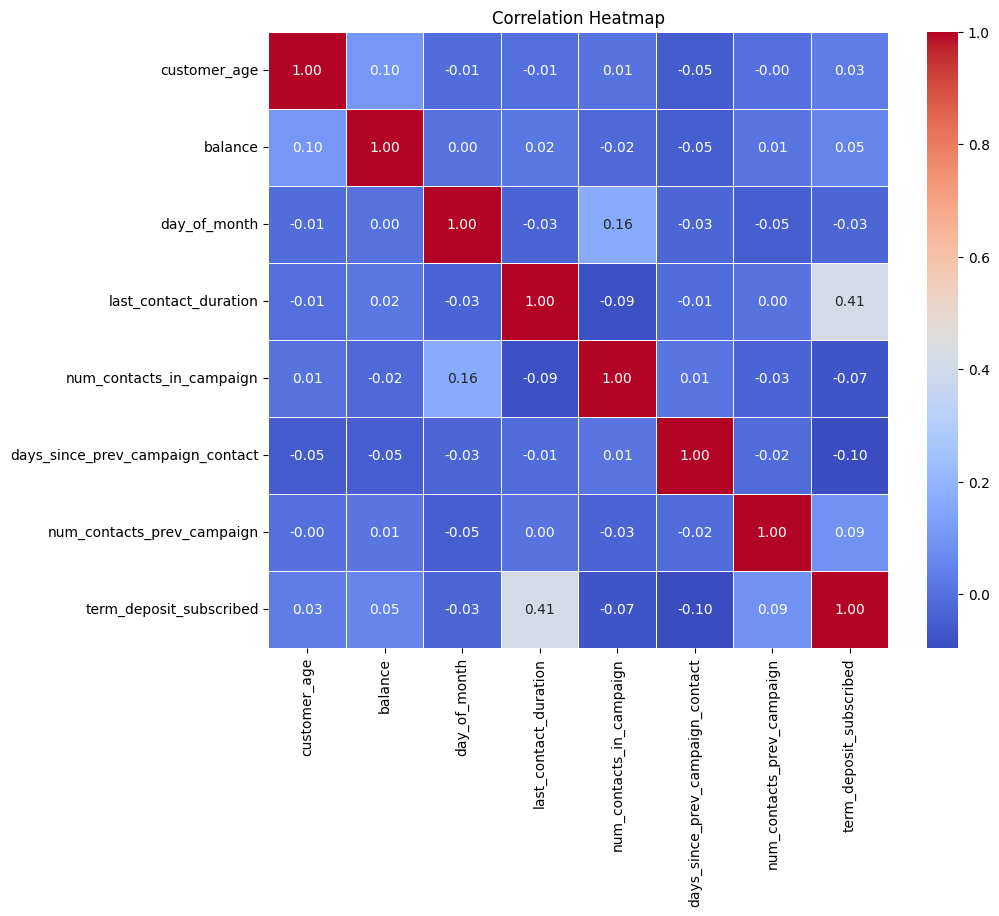

In [61]:
# Define numerical columns
numerical_columns = [
    'customer_age', 'balance', 'day_of_month','last_contact_duration',
    'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
    'num_contacts_prev_campaign','term_deposit_subscribed'
]

numeric_df = df[numerical_columns]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Fishes Score**

In [ ]:
pip install numpy pandas matplotlib skfeature-chappers

In [ ]:
df.columns

In [ ]:

import pandas as pd
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline


# Separating the features and the target
X = df.drop(columns=['term_deposit_subscribed','job_type', 'housing_loan', 'personal_loan', 'communication_type', 'prev_campaign_outcome']).values
Y = df['term_deposit_subscribed'].values

# Calculating Fisher scores
ranks = fisher_score.fisher_score(X, Y)

# Creating a Series for plotting
feature_names = df.drop(columns=['term_deposit_subscribed','job_type', 'housing_loan', 'personal_loan', 'communication_type', 'prev_campaign_outcome']).columns
feat_importances = pd.Series(ranks, index=feature_names)

# Sorting the feature importances in ascending order
sorted_feat_importances = feat_importances.sort_values()

# Plotting the feature importances
sorted_feat_importances.plot(kind='barh', color='teal')
plt.xlabel('Fisher Score')
plt.ylabel('Features')
plt.title('Feature Importance Using Fisher Score')
plt.show()

# Return the ranks of the variables in ascending order
sorted_feat_importances


In [62]:
df

,customer_age,job_type,balance,housing_loan,personal_loan,communication_type,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,0.126582,4,0.075399,1,0,2,0.833333,0.061837,0.048387,0.257466,0.000000,3,0.0
1,0.202532,1,0.081291,0,1,0,0.566667,0.029184,0.016129,0.150575,0.003636,1,0.0
2,0.354430,9,0.078767,0,0,0,0.133333,0.020612,0.048387,0.257466,0.000000,3,0.0
3,0.202532,7,0.072829,1,0,2,0.633333,0.025918,0.032258,0.257466,0.000000,3,0.0
4,0.291139,1,0.085086,1,0,0,0.400000,0.010000,0.016129,0.257466,0.000000,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.506329,0,0.077959,1,0,0,0.033333,0.020204,0.016129,0.303448,0.010909,1,0.0
31643,0.417722,4,0.082543,0,0,2,0.633333,0.006327,0.096774,0.257466,0.000000,3,0.0
31644,0.291139,10,0.075008,1,0,2,0.733333,0.018163,0.016129,0.257466,0.000000,3,0.0
31645,0.379747,7,0.097315,0,0,0,0.333333,0.044082,0.080645,0.257466,0.000000,3,0.0


**Information gain.**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Sample numeric columns
numeric_columns = df.columns.tolist()

# Assuming `data` is your DataFrame containing the relevant columns
X = df[numeric_columns].values
Y = df['term_deposit_subscribed'].values  # Target variable

# Calculate Information Gain for each feature
information_gains = mutual_info_classif(X, Y)

# Create a DataFrame to store the Information Gain values for each feature
information_gain_df = pd.DataFrame(information_gains, index=numeric_columns, columns=['Information Gain'])

# Sort features by Information Gain in descending order
information_gain_df = information_gain_df.sort_values(by='Information Gain', ascending=False)

# Display Information Gain values
print("Information Gain for each feature:")
print(information_gain_df)

#  We are getting three different combinations of features here.

1. last_contact_duration,prev_campaign_outcome,last_contact_duration,communication_type,prev_campaign_outcome, housing_loan

In [63]:
df.columns

Index(['customer_age', 'job_type', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [64]:
# Selected features for Model Building.
Features = ['last_contact_duration','days_since_prev_campaign_contact','communication_type','num_contacts_prev_campaign','prev_campaign_outcome', 'housing_loan']

df = df.drop(['customer_age', 'job_type', 'balance',
       'personal_loan', 'day_of_month',
       'days_since_prev_campaign_contact'], axis=1)

In [ ]:
df

In [ ]:
df.dtypes

**Checking the distribution of the selected features.**

In [65]:
from scipy.stats import skew
#numeric_features = data.select_dtypes(include=['number'])
skewness = df.apply(skew)
print(skewness)

housing_loan                  -0.238864
communication_type             0.765034
last_contact_duration          3.185786
num_contacts_in_campaign       5.009758
num_contacts_prev_campaign    45.830834
prev_campaign_outcome         -1.962503
term_deposit_subscribed        2.538607
dtype: float64


# **Predictive Modelling**

In [66]:
from sklearn.model_selection import train_test_split

X= df.drop(columns=['term_deposit_subscribed'])
y= df['term_deposit_subscribed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standard Scaling.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X= df.drop(columns=['term_deposit_subscribed'])
y= df['term_deposit_subscribed']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['num_contacts_prev_campaign'	,'num_contacts_in_campaign'	,'prev_campaign_outcome']])
X.drop(columns=['num_contacts_prev_campaign'	,'num_contacts_in_campaign'	,'prev_campaign_outcome'], inplace=True)
X_df = pd.DataFrame(X_scaled, columns=['num_contacts_prev_campaign'	,'num_contacts_in_campaign'	,'prev_campaign_outcome'])
X=pd.concat([X,X_df],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalization.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler

X= df.drop(columns=['term_deposit_subscribed'])
y= df['term_deposit_subscribed']

normalizer = MinMaxScaler()
X_normal = normalizer.fit_transform(X[['num_contacts_prev_campaign'	,'num_contacts_in_campaign'	,'prev_campaign_outcome']])
X.drop(columns=['num_contacts_prev_campaign'	,'num_contacts_in_campaign'	,'prev_campaign_outcome'], inplace=True)
X_df = pd.DataFrame(X_normal, columns=['num_contacts_prev_campaign'	,'num_contacts_in_campaign'	,'prev_campaign_outcome'])
X=pd.concat([X,X_df],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Transformations.

# 1. 1. Yeo-Johnson transformation.

In [69]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_transformed = pt.fit_transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

# Step 3: Apply the same transformation to the test data
X_test_transformed = pt.transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

In [82]:
df

,housing_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,1,2,0.061837,0.048387,0.000000,3,0.0
1,0,0,0.029184,0.016129,0.003636,1,0.0
2,0,0,0.020612,0.048387,0.000000,3,0.0
3,1,2,0.025918,0.032258,0.000000,3,0.0
4,1,0,0.010000,0.016129,0.000000,3,0.0
...,...,...,...,...,...,...,...
31642,1,0,0.020204,0.016129,0.010909,1,0.0
31643,0,2,0.006327,0.096774,0.000000,3,0.0
31644,1,2,0.018163,0.016129,0.000000,3,0.0
31645,0,0,0.044082,0.080645,0.000000,3,0.0


# **Model Selection**

In [70]:
pip install xgboost

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier # Run after "pip install xgboost"
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

models = {
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'XGBoost': XGBClassifier(),
  'Gradient Boosting': GradientBoostingClassifier(),
  'Support Vector Machine': SVC()
}

In [72]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred1=model.predict(X_train)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred1)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the results
    print('*'*30)
    print(f'{name} Classifier:')
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}\n')

******************************
Decision Tree Classifier:
Train Accuracy: 0.9736
Test Accuracy: 0.8859
Precision: 0.8802
Recall: 0.8859
F1 Score: 0.8828

******************************
Random Forest Classifier:
Train Accuracy: 0.9736
Test Accuracy: 0.8950
Precision: 0.8888
Recall: 0.8950
F1 Score: 0.8916

******************************
XGBoost Classifier:
Train Accuracy: 0.9234
Test Accuracy: 0.9143
Precision: 0.9033
Recall: 0.9143
F1 Score: 0.9062

******************************
Gradient Boosting Classifier:
Train Accuracy: 0.9162
Test Accuracy: 0.9149
Precision: 0.9028
Recall: 0.9149
F1 Score: 0.9049

******************************
Support Vector Machine Classifier:
Train Accuracy: 0.8961
Test Accuracy: 0.9014
Precision: 0.8774
Recall: 0.9014
F1 Score: 0.8795



# **Fine Tuning**

# **Gradient Search**

In [73]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

In [74]:
xgb = XGBClassifier(maxdepth=8,use_label_encoder=False, eval_metric='logloss')
xg_param_grid = {
    'learning_rate': [0.1,0.2,0.3],
    'n_estimators': [100,150,200,],
    'reg_alpha': [0.1, 0.5,0.7],
    'reg_lambda': [1.5,2,2.5]
}


# Perform GridSearchCV
xg_grid_search = GridSearchCV(estimator=xgb, param_grid=xg_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
xg_grid_search.fit(X_train, y_train)
best_model = xg_grid_search.best_estimator_

# Print the best parameters and cross-validation score
print(f"Best parameters found: {xg_grid_search.best_params_}")
print(f"Best cross-validation score: {xg_grid_search.best_score_}")

print("-" * 50)

# Predict and evaluate on the test set
y_pred = xg_grid_search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("-" * 50)
print("Best Accuracy Score:", round((xg_grid_search.best_score_) * 100, 2), " %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", round((test_accuracy) * 100, 2), " %")

# Fit the best model again and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted') * 100, 2)
recall = round(recall_score(y_test, y_pred, average='weighted') * 100, 2)
f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.2f} %')
print("-" * 50)
print(best_model)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:53:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "maxdepth" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'learning_rate': 0.1, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 2.5}
Best cross-validation score: 0.9105544650556616
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      7102
         1.0       0.65      0.41      0.50       810

    accuracy                           0.92      7912
   macro avg       0.79      0.69      0.73      7912
weighted avg       0.91      0.92      0.91      7912

--------------------------------------------------
Best Accuracy Score: 91.06  %
Test Set Accuracy: 91.63  %


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:53:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "maxdepth" } are not used.

  warnings.warn(smsg, UserWarning)


Precision: 90.53 %
Recall: 91.63 %
F1 Score: 90.77 %
--------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, maxdepth=8, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


# **XGBoost**

# **Test Data**

# **GradientBoostingClassifier()**

In [76]:
gb1 = GradientBoostingClassifier(criterion='squared_error')
gb1.fit(X_train, y_train)
gb1

GradientBoostingClassifier(criterion='squared_error')

In [77]:
# Extract Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb1.feature_importances_
})

# Get Predictions on the Test Set
y_pred = gb1.predict(X_test)

# Create DataFrame for Predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Combine Feature Importances and Predictions into a single DataFrame
rdf = pd.concat([feature_importances, predictions_df], axis=1)

# Print the combined DataFrame
print("Resulting DataFrame (rdf):")
print(rdf.head())

Resulting DataFrame (rdf):
                      Feature  Importance  Actual  Predicted
0                housing_loan    0.071059     NaN        NaN
1          communication_type    0.050120     NaN        NaN
2       last_contact_duration    0.566225     NaN        NaN
3  num_contacts_prev_campaign    0.108557     0.0        0.0
4    num_contacts_in_campaign    0.015220     NaN        NaN


# **Test Data**

In [78]:
td2 = pd.read_csv('/content/Test.csv')
td2

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure


In [79]:
# Selected features for Model Building.
Features = ['last_contact_duration','communication_type','num_contacts_prev_campaign','prev_campaign_outcome', 'num_contacts_in_campaign','housing_loan']

In [80]:
# Selected features for the new dataframe
selected_features = ['housing_loan','communication_type','last_contact_duration','num_contacts_in_campaign','num_contacts_prev_campaign','prev_campaign_outcome']

# Create a new dataframe with the selected features
selected_df = td2[selected_features]

# Display the first few rows of the new dataframe
print(selected_df.head())

  housing_loan communication_type  last_contact_duration  \
0           no           cellular                   90.0   
1          yes           cellular                   63.0   
2           no           cellular                  208.0   
3           no            unknown                   34.0   
4           no           cellular                  127.0   

   num_contacts_in_campaign  num_contacts_prev_campaign prev_campaign_outcome  
0                       2.0                           0               unknown  
1                       2.0                           0               unknown  
2                       1.0                           0               unknown  
3                       1.0                           0               unknown  
4                       1.0                           1               success  


In [81]:
df1 = pd.DataFrame(selected_df)
df1

,housing_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,no,cellular,90.0,2.0,0,unknown
1,yes,cellular,63.0,2.0,0,unknown
2,no,cellular,208.0,1.0,0,unknown
3,no,unknown,34.0,1.0,0,unknown
4,no,cellular,127.0,1.0,1,success
...,...,...,...,...,...,...
13559,yes,cellular,94.0,1.0,0,unknown
13560,yes,telephone,155.0,1.0,0,unknown
13561,yes,unknown,231.0,4.0,0,unknown
13562,yes,cellular,243.0,2.0,5,failure


# **Preprocessing**

In [83]:
# Select categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns
categorical_cols

Index(['housing_loan', 'communication_type', 'prev_campaign_outcome'], dtype='object')

In [85]:
# Select numerical columns
numerical_columns = df1.select_dtypes(include=['number']).columns.tolist()



# Calculate skewness for each remaining numerical column
skewness = df1[numerical_columns].apply(lambda x: skew(x.dropna()))

print("Skewness of numerical columns:\n", skewness)

Skewness of numerical columns:
 last_contact_duration         3.061320
num_contacts_in_campaign      4.435679
num_contacts_prev_campaign    6.261000
dtype: float64


In [86]:

# Identify numerical columns
numerical_columns = ['last_contact_duration', 'num_contacts_prev_campaign', 'num_contacts_in_campaign']

# Calculate skewness for each numerical column
skewness = df1[numerical_columns].skew()

# Determine imputation methods based on skewness
imputation_methods = {}
for column in numerical_columns:
    if  abs(skewness[column]) < 0.7:
        imputation_methods[column] = 'median'
    else:
        imputation_methods[column] = 'mean'

# Apply imputation based on the determined methods
for column, strategy in imputation_methods.items():
    if strategy == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif strategy == 'median':
        imputer = SimpleImputer(strategy='median')
    else:
        raise ValueError(f"Unsupported imputation strategy: {strategy}")

    df1[[column]] = imputer.fit_transform(df1[[column]])

# Display the updated dataset
print(df1.head())

  housing_loan communication_type  last_contact_duration  \
0           no           cellular                   90.0   
1          yes           cellular                   63.0   
2           no           cellular                  208.0   
3           no            unknown                   34.0   
4           no           cellular                  127.0   

   num_contacts_in_campaign  num_contacts_prev_campaign prev_campaign_outcome  
0                       2.0                         0.0               unknown  
1                       2.0                         0.0               unknown  
2                       1.0                         0.0               unknown  
3                       1.0                         0.0               unknown  
4                       1.0                         1.0               success  


In [87]:
# Object Columns
for column in categorical_cols:
    df1[column].fillna(df1[column].mode()[0], inplace=True)

In [88]:
df1

,housing_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,no,cellular,90.0,2.0,0.0,unknown
1,yes,cellular,63.0,2.0,0.0,unknown
2,no,cellular,208.0,1.0,0.0,unknown
3,no,unknown,34.0,1.0,0.0,unknown
4,no,cellular,127.0,1.0,1.0,success
...,...,...,...,...,...,...
13559,yes,cellular,94.0,1.0,0.0,unknown
13560,yes,telephone,155.0,1.0,0.0,unknown
13561,yes,unknown,231.0,4.0,0.0,unknown
13562,yes,cellular,243.0,2.0,5.0,failure


In [89]:
# 1. Handle Missing Values

# Check for missing values
missing_values = df1.isnull().sum()
print("Missing Values Before Cleaning:")
print(missing_values)

Missing Values Before Cleaning:
housing_loan                  0
communication_type            0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64


In [91]:
cols=df1.columns
# Should be done after encoding and before scaling
from sklearn.impute import KNNImputer
# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=2)

# Fit the imputer on the data and transform it
df1 = imputer.fit_transform(df1)

# Convert the numpy array back to a DataFrame with the original columns
df1 = pd.DataFrame(df1,columns=cols)
df1

,housing_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,0.0,0.0,90.0,2.0,0.0,3.0
1,1.0,0.0,63.0,2.0,0.0,3.0
2,0.0,0.0,208.0,1.0,0.0,3.0
3,0.0,2.0,34.0,1.0,0.0,3.0
4,0.0,0.0,127.0,1.0,1.0,2.0
...,...,...,...,...,...,...
13559,1.0,0.0,94.0,1.0,0.0,3.0
13560,1.0,1.0,155.0,1.0,0.0,3.0
13561,1.0,2.0,231.0,4.0,0.0,3.0
13562,1.0,0.0,243.0,2.0,5.0,0.0


In [90]:
# Creating a label encoder object
le = LabelEncoder()

# Applying label encoding to each specified column
for column in categorical_cols:
    df1[column] = le.fit_transform(df1[column])

In [92]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = df1.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(drop='first',sparse_output=False)
one_hot_encoded = encoder.fit_transform(df1[categorical_columns])
one_hot_df1 = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

#data = data.drop(columns=['PreferedOrderCat','MaritalStatus'])
# Drop the original categorical columns from the dataset
df2= df2.drop(columns=categorical_columns, axis=1)

# Concatenate the one-hot encoded dataframe with the original dataframe
df1 = pd.concat([df1, one_hot_df1], axis=1)
df1 = pd.DataFrame(df1)
df1

,housing_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,0.0,0.0,90.0,2.0,0.0,3.0
1,1.0,0.0,63.0,2.0,0.0,3.0
2,0.0,0.0,208.0,1.0,0.0,3.0
3,0.0,2.0,34.0,1.0,0.0,3.0
4,0.0,0.0,127.0,1.0,1.0,2.0
...,...,...,...,...,...,...
13559,1.0,0.0,94.0,1.0,0.0,3.0
13560,1.0,1.0,155.0,1.0,0.0,3.0
13561,1.0,2.0,231.0,4.0,0.0,3.0
13562,1.0,0.0,243.0,2.0,5.0,0.0


In [93]:
# Select categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns
categorical_cols
# Ensure numerical features are non-negative by applying MinMaxScaler
numerical_cols = df1.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

In [94]:
# Verify the column order
print("Columns in correct order:", df1.columns.tolist())


Columns in correct order: ['housing_loan', 'communication_type', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign', 'prev_campaign_outcome']


In [95]:
# Ensure column names match exactly
df1.columns = [col.strip() for col in df1.columns]

# Verify column names again
print("Verified columns:", df1.columns.tolist())


Verified columns: ['housing_loan', 'communication_type', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign', 'prev_campaign_outcome']


In [97]:
# Get the feature names from the model
trained_feature_names = best_model.get_booster().feature_names

# Print the feature names from the model
print("Feature names from the model:", trained_feature_names)

# Print the feature names from df1
print("Feature names in df1:", df1.columns.tolist())

# Ensure columns are in the exact order expected by the model
df1 = df1[trained_feature_names]

# Print columns after reordering to verify
print("Columns after reordering:", df1.columns.tolist())

# Make predictions using the reordered df1
y_pred = best_model.predict(df1)
y_pred = pd.DataFrame(y_pred)

print(y_pred.shape)

Feature names from the model: ['housing_loan', 'communication_type', 'last_contact_duration', 'num_contacts_prev_campaign', 'num_contacts_in_campaign', 'prev_campaign_outcome']
Feature names in df1: ['housing_loan', 'communication_type', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign', 'prev_campaign_outcome']
Columns after reordering: ['housing_loan', 'communication_type', 'last_contact_duration', 'num_contacts_prev_campaign', 'num_contacts_in_campaign', 'prev_campaign_outcome']
(13564, 1)


In [98]:
y_pred

,0
0,0
1,0
2,0
3,0
4,1
...,...
13559,0
13560,0
13561,0
13562,0


In [100]:


y_pred.tail(10)

,0
13554,0
13555,0
13556,0
13557,0
13558,1
13559,0
13560,0
13561,0
13562,0
13563,0


In [101]:
td2['term_deposit_subscribed'] = y_pred
td2.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown,0
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown,0
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown,0
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown,0
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success,1


**Standard Scaling**

In [103]:
td2.to_csv("test_final.csv",index=False)

In [105]:
data = pd.read_csv('/content/test_final.csv')
data

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown,0
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown,0
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown,0
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown,0
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown,0
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown,0
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown,0
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure,0


In [107]:
df3 = data.copy()
df3

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown,0
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown,0
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown,0
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown,0
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown,0
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown,0
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown,0
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure,0


# ** Feature Transform**

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


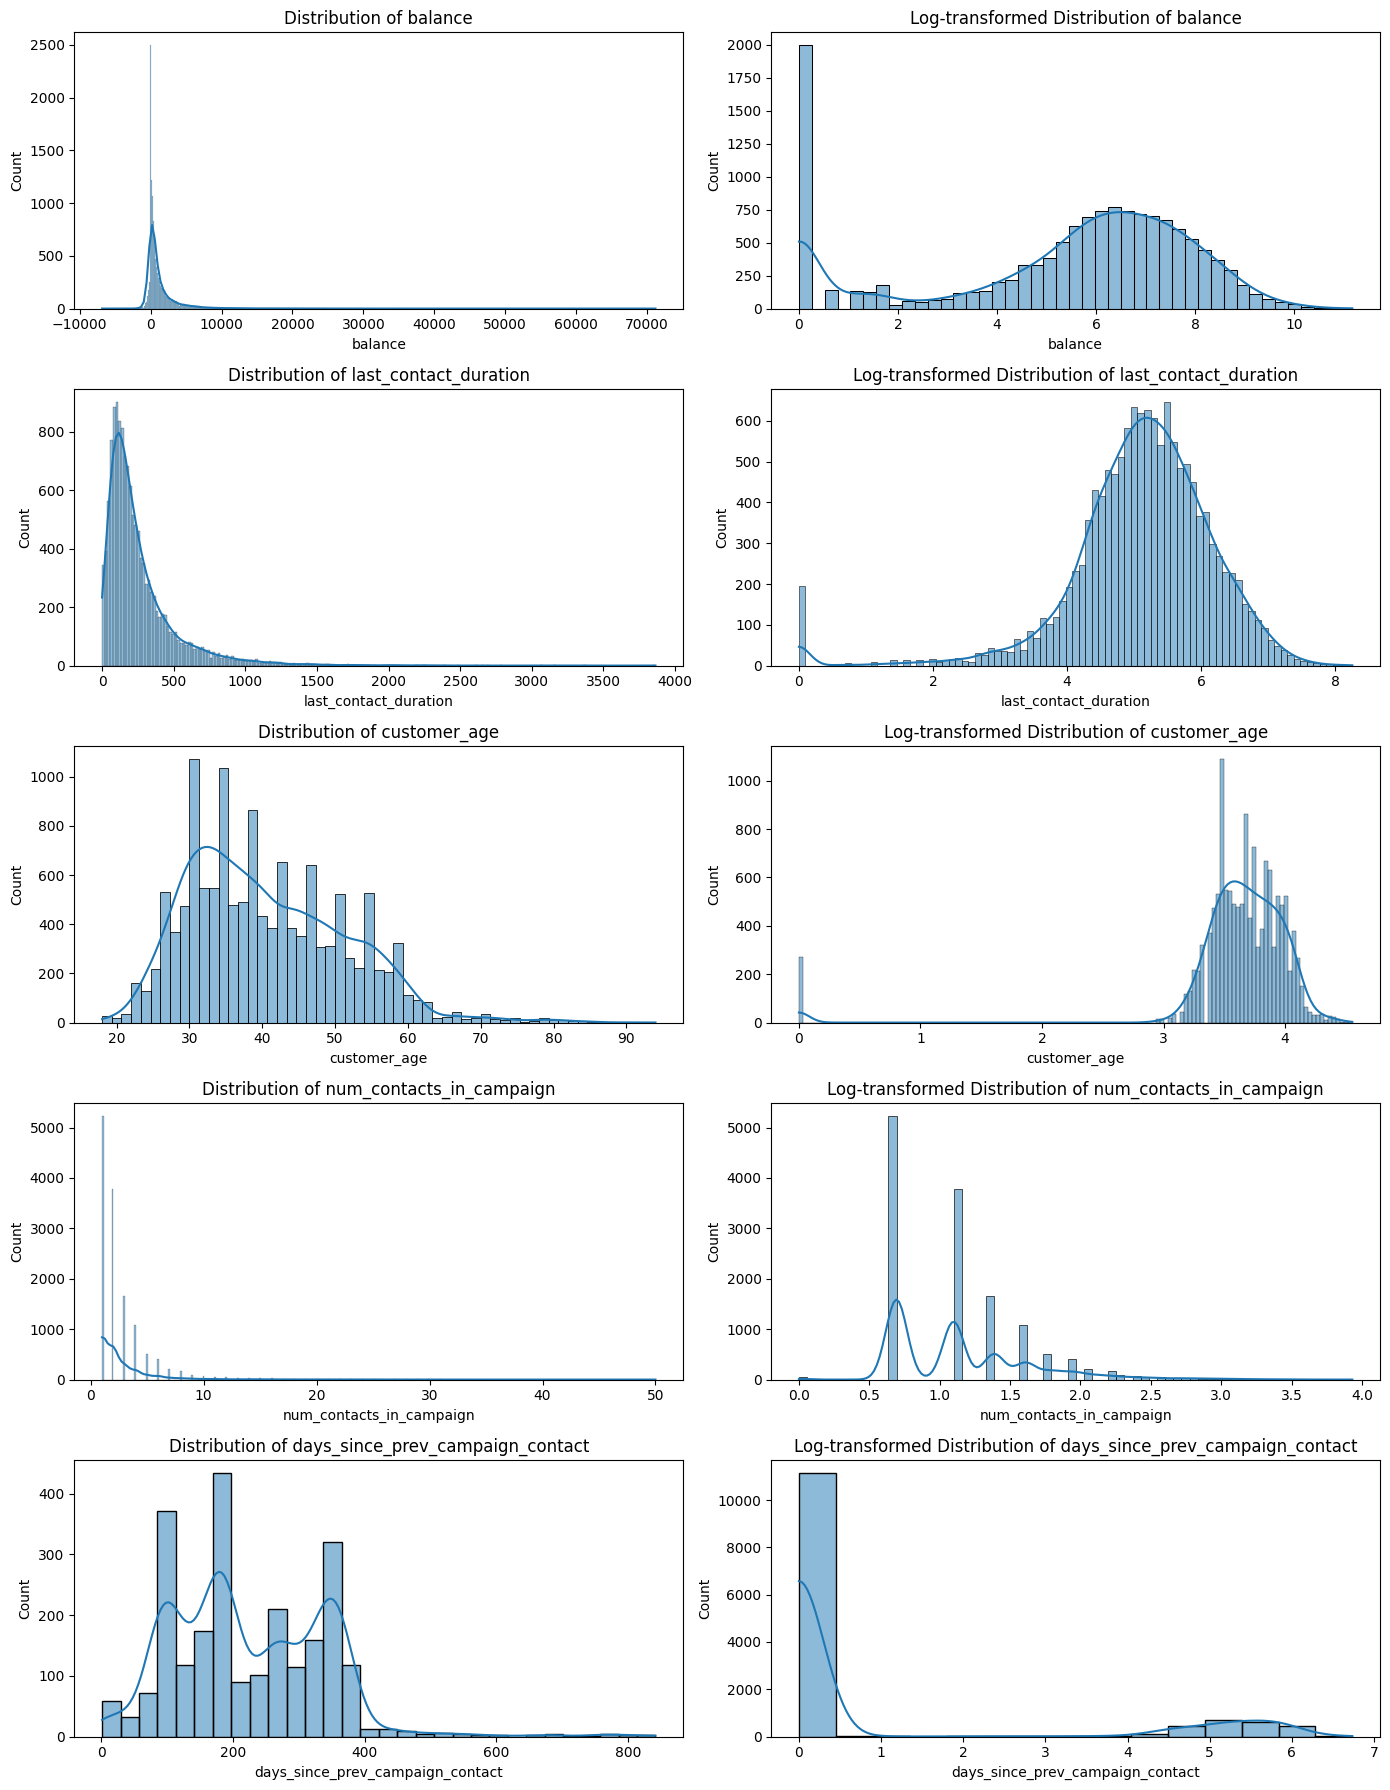

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_17231,4.025352,retired,married,tertiary,no,8.873048,no,no,cellular,13,aug,4.510860,1.098612,0.000000,0,unknown,0
1,id_34508,3.218876,blue-collar,single,secondary,no,5.192957,yes,no,cellular,18,may,4.158883,1.098612,0.000000,0,unknown,0
2,id_44504,3.850148,technician,divorced,secondary,no,4.969813,no,no,cellular,8,jul,5.342334,0.693147,0.000000,0,unknown,0
3,id_174,4.043051,housemaid,single,unknown,no,8.703507,no,no,unknown,6,jun,3.555348,0.693147,0.000000,0,unknown,0
4,id_2115,4.143135,retired,married,secondary,no,7.977282,no,no,cellular,12,apr,4.852030,0.693147,5.241747,1,success,1


In [109]:
# Define the numerical features to check skewness
numerical_features = ['balance', 'last_contact_duration', 'customer_age', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact']

# Plot histograms to visualize the distributions and apply log transformation
fig, axs = plt.subplots(len(numerical_features), 2, figsize=(14, 18))

for i, feature in enumerate(numerical_features):
    # Original distribution
    sns.histplot(df3[feature], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Distribution of {feature}')

    # Apply log transformation and handle any infinities or NaNs
    df3[feature] = np.log1p(df3[feature])
    df3[feature].replace([np.inf, -np.inf], np.nan, inplace=True)
    df3[feature].fillna(0, inplace=True)

    # Transformed distribution
    sns.histplot(df3[feature], kde=True, ax=axs[i, 1])
    axs[i, 1].set_title(f'Log-transformed Distribution of {feature}')

plt.tight_layout()
plt.show()

# Check the first few rows after transformation
df3.head()

1. Balance
Original Distribution: The original distribution of the balance feature was heavily right-skewed, indicating that most customers had low balances, with a few having very high balances.
Transformed Distribution: After log transformation, the distribution of balance became more normalized, reducing the impact of extreme values and making the feature more suitable for clustering.
2. Last Contact Duration
Original Distribution: The last_contact_duration feature also exhibited right-skewness, showing that most contact durations were short, with some being significantly longer.
Transformed Distribution: The log transformation normalized the distribution, providing a more balanced view of contact durations.
3. Customer Age
Original Distribution: The customer_age feature had some degree of skewness, with a larger concentration of younger ages.
Transformed Distribution: Applying log transformation normalized the age distribution, allowing better differentiation between different age groups in the clustering process.
4. Number of Contacts in Campaign
Original Distribution: The num_contacts_in_campaign feature was right-skewed, indicating that most customers were contacted a few times, with some being contacted many times.
Transformed Distribution: Log transformation normalized the contact count distribution, reducing the impact of customers with exceptionally high contact counts.
5. Days Since Previous Campaign Contact
Original Distribution: The days_since_prev_campaign_contact feature was right-skewed, showing that for many customers, a long time had passed since the last contact.
Transformed Distribution: After log transformation, the distribution became more balanced, making it easier to cluster customers based on recent contact history.
Overall Benefits of Transformation
Reduced Skewness: Log transformations effectively reduced the skewness of all specified features, leading to more normally distributed data.
Improved Clustering Performance: By normalizing the distributions, the clustering algorithm can better distinguish between different clusters without being overly influenced by extreme values.
Enhanced Interpretability: The transformed features provide a clearer understanding of the underlying data patterns, aiding in the interpretation of clustering results

# **8.Feature Derivation**

In [111]:
# Derived feature: Contact Rate in current campaign
df3['contact_rate_current_campaign'] = df3['num_contacts_in_campaign'] / df3['last_contact_duration']
df3['contact_rate_current_campaign'].replace([np.inf, -np.inf], np.nan, inplace=True)
df3['contact_rate_current_campaign'].fillna(0, inplace=True)

# Derived feature: Age Group
df3['age_group'] = pd.cut(df3['customer_age'], bins=[0, 30, 50, 70, np.inf], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

# Derived feature: Balance to Duration Ratio
df3['balance_duration_ratio'] = df3['balance'] / df3['last_contact_duration']
df3['balance_duration_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df3['balance_duration_ratio'].fillna(0, inplace=True)

# Derived feature: Campaign Contact Frequency
df3['campaign_contact_frequency'] = df3['num_contacts_in_campaign'] / (df3['days_since_prev_campaign_contact'] + 1)
df3['campaign_contact_frequency'].replace([np.inf, -np.inf], np.nan, inplace=True)
df3['campaign_contact_frequency'].fillna(0, inplace=True)

# Derived feature: Recent Contact Indicator
df3['recent_contact'] = df3['days_since_prev_campaign_contact'].apply(lambda x: 1 if x <= 30 else 0)

In [112]:
df.head()

,housing_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,contact_rate_current_campaign
0,1,2,0.061837,0.048387,0.000000,3,0.0,0.782498
1,0,0,0.029184,0.016129,0.003636,1,0.0,0.552673
2,0,0,0.020612,0.048387,0.000000,3,0.0,2.347493
3,1,2,0.025918,0.032258,0.000000,3,0.0,1.244602
4,1,0,0.010000,0.016129,0.000000,3,0.0,1.612903


**Segmentation and Targeting**: Derived features help in better segmenting the customer base, allowing for more targeted marketing strategies. For example, understanding which age groups respond better can help tailor specific messages.

**Resource Allocation**: Features like contact rate and campaign contact frequency can inform resource allocation, helping to balance between maintaining customer engagement and avoiding excessive contact.

**Customer Value**: Features like balance to duration ratio help identify high-value customers who might need more personalized and strategic communication.

**Campaign Effectiveness**: Analyzing the impact of recent contacts and contact frequency can provide insights into campaign timing and strategy effectiveness.

# 9.  Encoding and Standardization:
**

 **1.Encode Categorical Features:**

In [114]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome']
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = one_hot_encoder.fit_transform(df3[categorical_features])

# Convert encoded features to DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(categorical_features))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**2. Standardize Numerical Features:**

In [116]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign']
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df3[numerical_features])

# Convert scaled features to DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)


**3. Combine Encoded Categorical and Scaled Numerical Features:**

In [117]:
# Combine encoded categorical and scaled numerical features
processed_data = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)


# **9. Feature Selection**
# correlation matrix.

In [118]:
from sklearn.feature_selection import VarianceThreshold

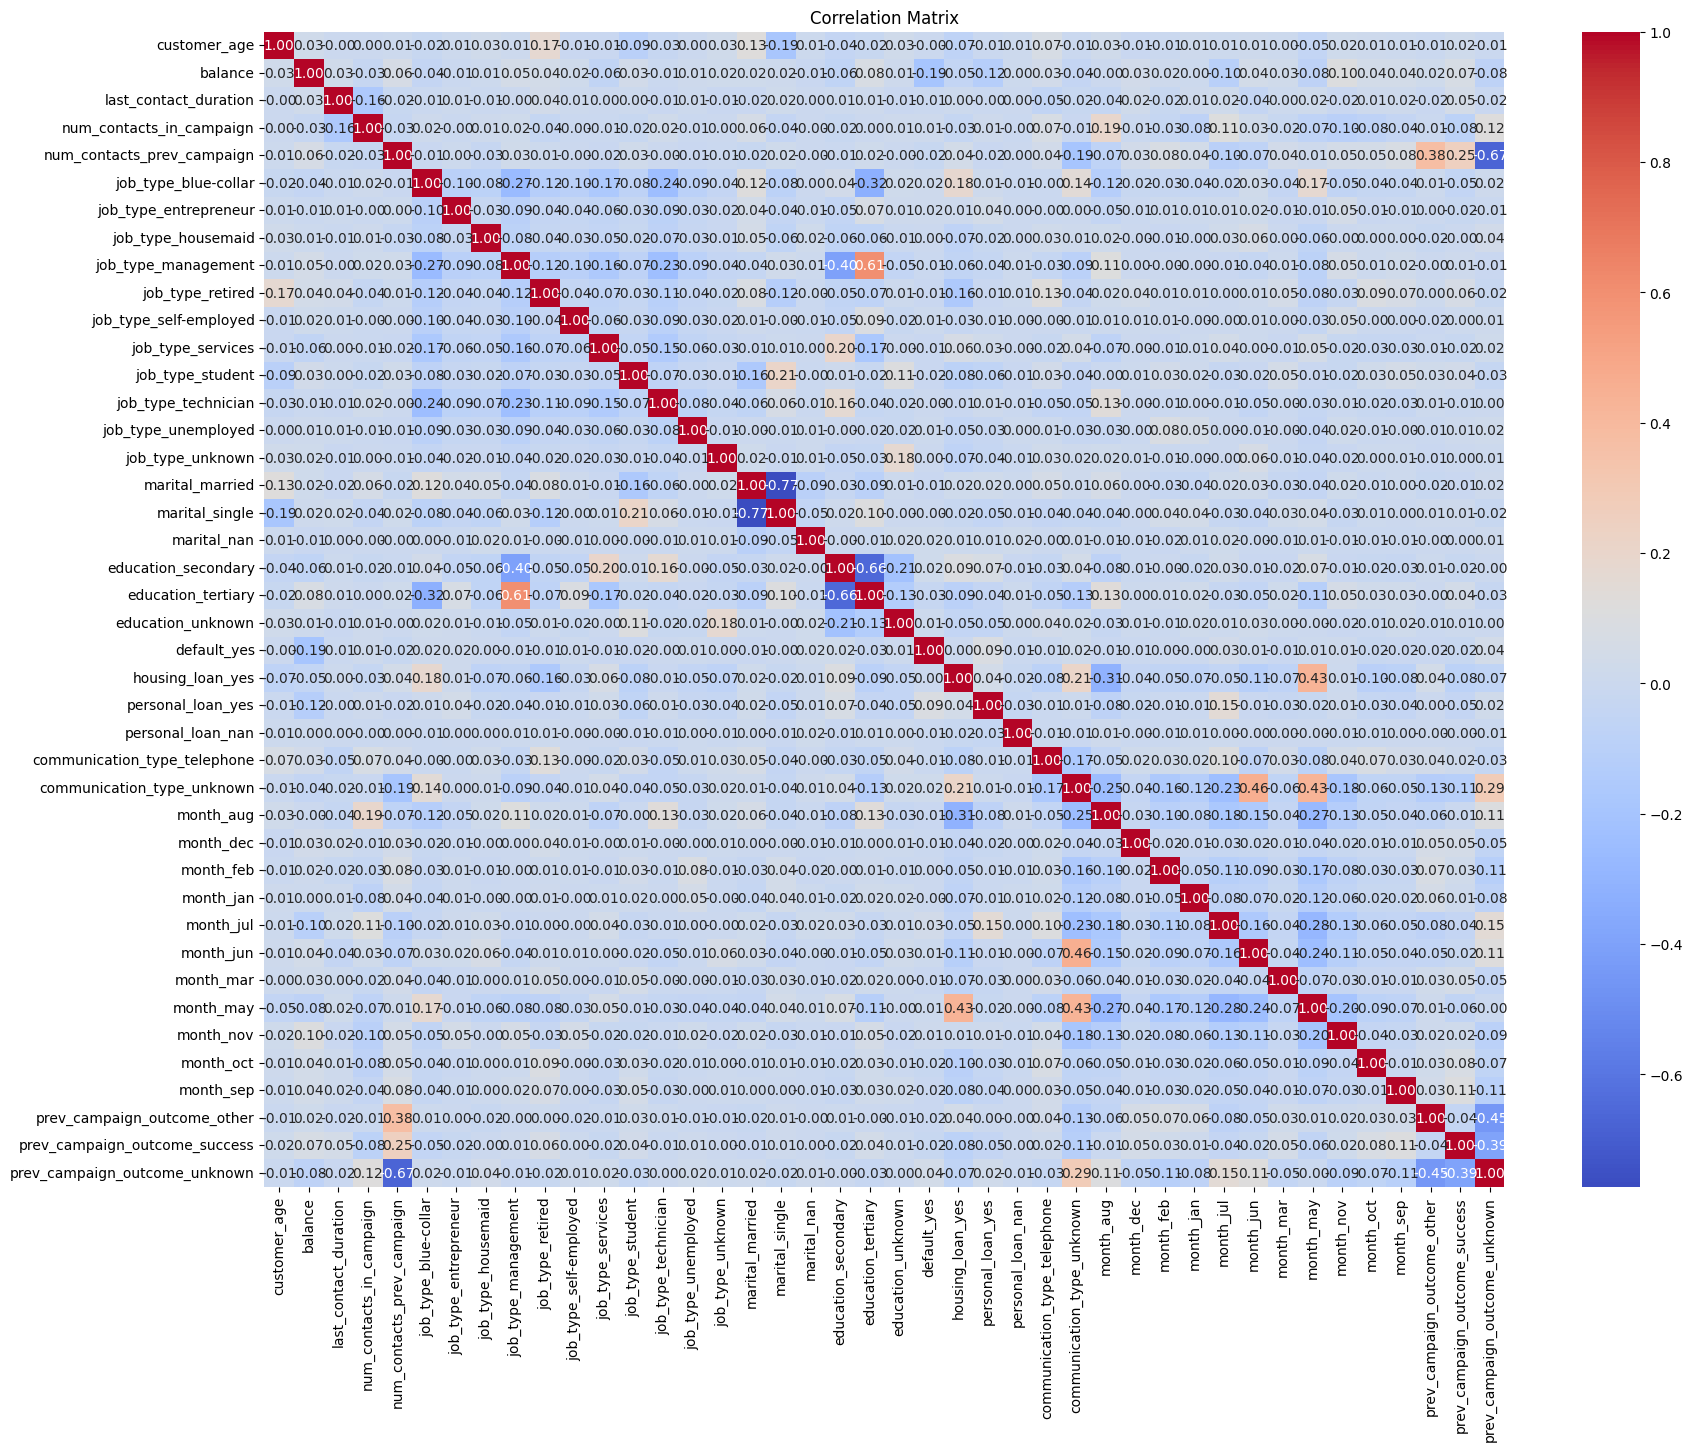

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
0,0.708803,1.292277,-0.544057,-0.105752,-0.314336
1,-0.695641,-0.028747,-0.861921,-0.105752,-0.314336
2,0.403693,-0.108848,0.206833,-0.903286,-0.314336
3,0.739626,1.231417,-1.406963,-0.903286,-0.314336
4,0.913918,0.970728,-0.235952,-0.903286,0.253092


In [119]:
# Compute the correlation matrix
correlation_matrix = processed_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Remove features with low variance
selector = VarianceThreshold(threshold=0.7)  # You can adjust the threshold as needed
selected_features = selector.fit_transform(processed_data)

# Get the list of selected features
selected_feature_names = processed_data.columns[selector.get_support()]

# Convert selected features to DataFrame
selected_data = pd.DataFrame(selected_features, columns=selected_feature_names)

selected_data.head()

# Recursive Feature Elimination (RFE)

In [121]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize a model
model = LogisticRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=10)  # Specify the number of features to select
rfe = rfe.fit(selected_data, df3['term_deposit_subscribed'])  # Assuming 'term_deposit_subscribed' is the target variable

# Get the list of selected features
rfe_selected_features = selected_data.columns[rfe.support_]

# Convert RFE selected features to DataFrame
rfe_selected_data = selected_data[rfe_selected_features]

rfe_selected_data.head()


,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
0,0.708803,1.292277,-0.544057,-0.105752,-0.314336
1,-0.695641,-0.028747,-0.861921,-0.105752,-0.314336
2,0.403693,-0.108848,0.206833,-0.903286,-0.314336
3,0.739626,1.231417,-1.406963,-0.903286,-0.314336
4,0.913918,0.970728,-0.235952,-0.903286,0.253092


# Principal Component Analysis (PCA)

In [122]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=5)  # Specify the number of principal components
pca_data = pca.fit_transform(selected_data)

# Convert PCA result to DataFrame
pca_columns = [f'PC{i+1}' for i in range(pca_data.shape[1])]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

pca_df.head()


,PC1,PC2,PC3,PC4,PC5
0,-0.056415,0.955801,-0.662895,-0.922591,-0.609122
1,0.572570,-0.248709,0.572357,-0.267640,-0.740760
2,-0.703638,-0.280600,-0.476577,0.203834,-0.538342
3,-0.015680,1.080839,-0.575868,-0.648300,-1.742796
4,-0.796211,1.038400,-0.607247,-0.140842,-0.782561


# **10. Model Selection**

> Add blockquote



# 1. K Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

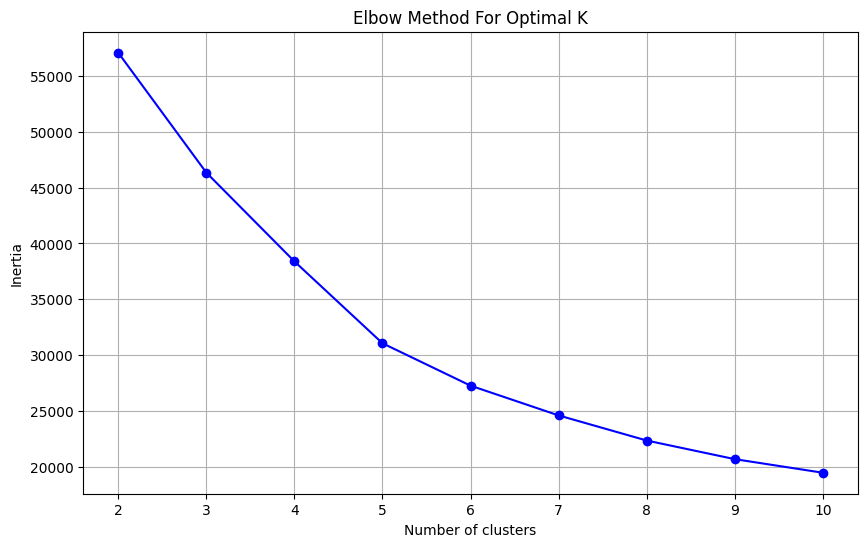

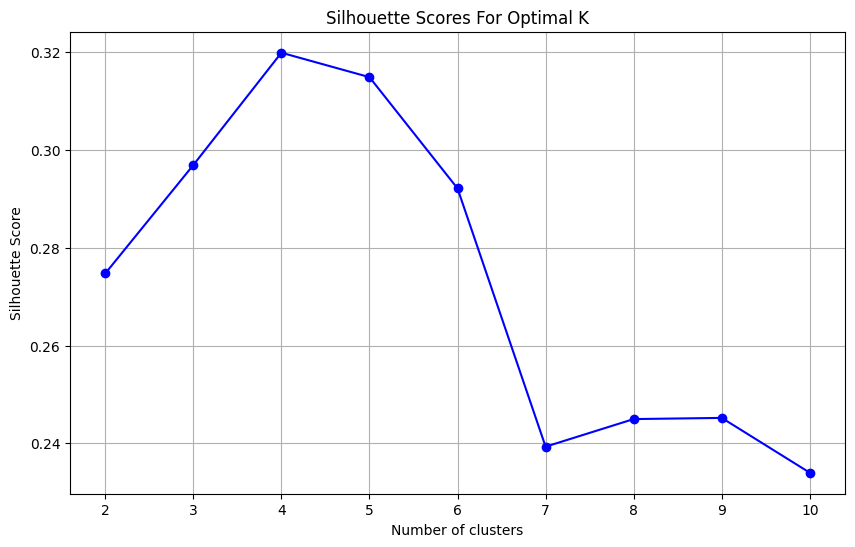

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,Cluster
0,-0.056415,0.955801,-0.662895,-0.922591,-0.609122,0
1,0.572570,-0.248709,0.572357,-0.267640,-0.740760,0
2,-0.703638,-0.280600,-0.476577,0.203834,-0.538342,0
3,-0.015680,1.080839,-0.575868,-0.648300,-1.742796,0
4,-0.796211,1.038400,-0.607247,-0.140842,-0.782561,0


In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

# Plot the Elbow method results
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.title('Silhouette Scores For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Choose the optimal number of clusters (e.g., based on Elbow method and Silhouette scores)
optimal_k = 4

# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)

# Add the cluster labels to the DataFrame
pca_df['Cluster'] = kmeans_labels

# Display the first few rows of the DataFrame with cluster labels
pca_df.head()


In the plot, the inertia decreases sharply from 2 to 4 clusters, then the rate of decrease starts to slow down. The most noticeable "elbow" appears around 4 or 5 clusters. Thus, the optimal number of clusters seems to be 4 or 5.

 The Silhouette Score measures how similar an object is to its own cluster compared to other clusters, with a higher score indicating better-defined clusters.

# Hierarchy Clustering

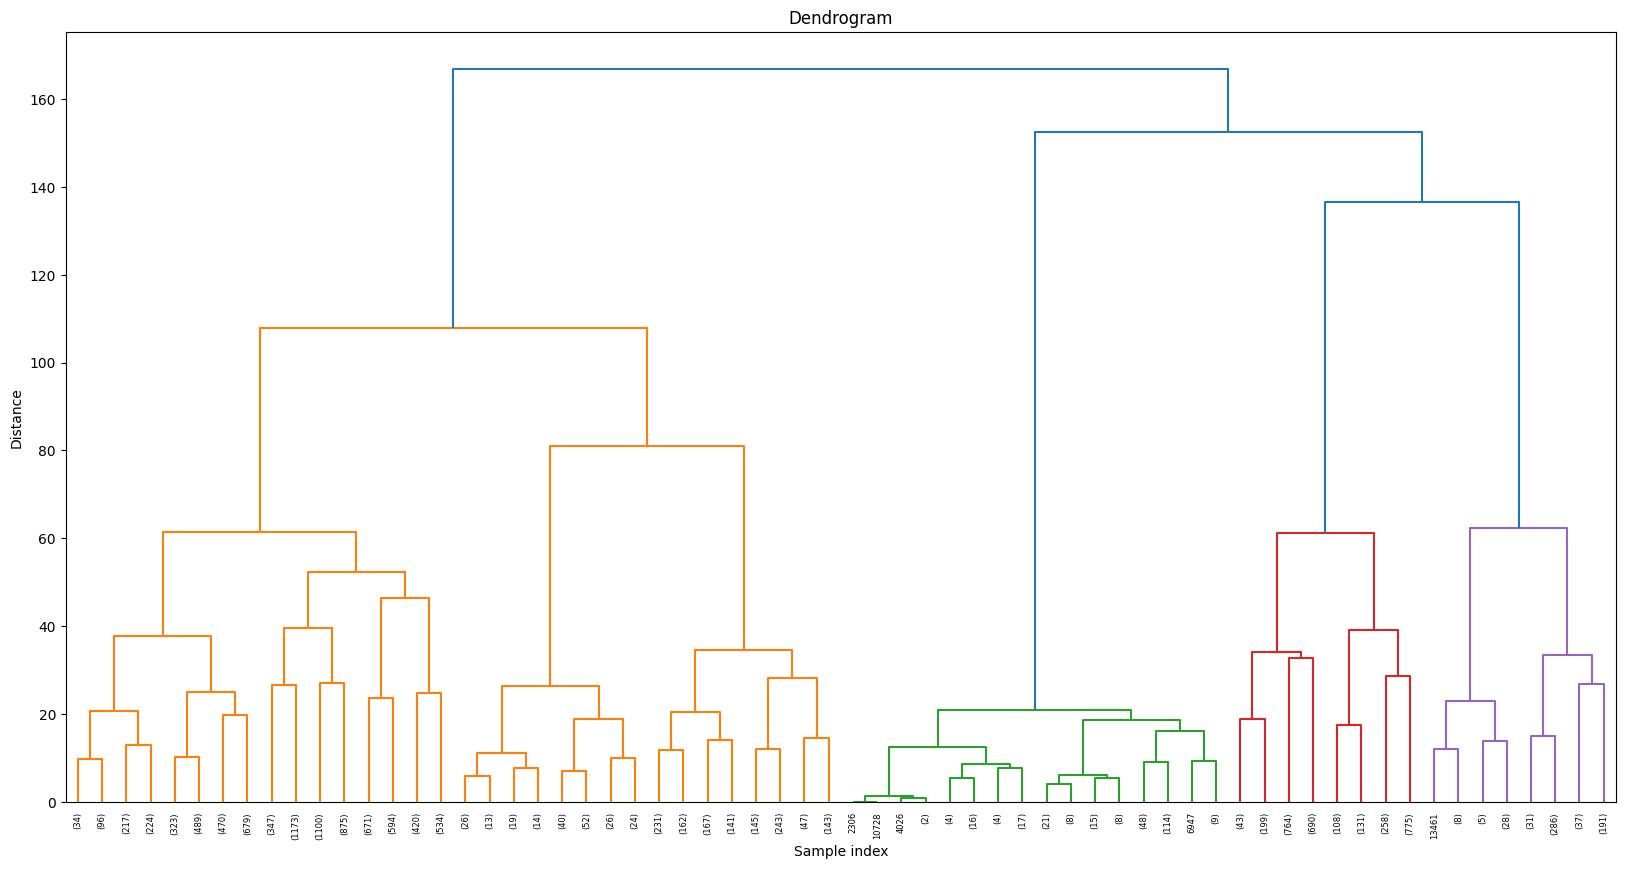

,PC1,PC2,PC3,PC4,PC5,Cluster,Hierarchical_Cluster
0,-0.056415,0.955801,-0.662895,-0.922591,-0.609122,0,1
1,0.572570,-0.248709,0.572357,-0.267640,-0.740760,0,1
2,-0.703638,-0.280600,-0.476577,0.203834,-0.538342,0,1
3,-0.015680,1.080839,-0.575868,-0.648300,-1.742796,0,1
4,-0.796211,1.038400,-0.607247,-0.140842,-0.782561,0,1


In [124]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Apply hierarchical clustering
Z = linkage(pca_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Choose the number of clusters (e.g., based on the dendrogram)
num_clusters = 4

# Apply the hierarchical clustering with the chosen number of clusters
hierarchical_labels = fcluster(Z, num_clusters, criterion='maxclust')

# Add the cluster labels to the DataFrame
pca_df['Hierarchical_Cluster'] = hierarchical_labels

# Display the first few rows of the DataFrame with hierarchical cluster labels
pca_df.head()
